## Contents:


### 1. [Dataset Overview](#1.-Dataset-Overview)

### 2. [Data Preprocessing](#2.-Data-Preprocessing)

### 3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)

### 4. [Model Training and Evaluation](#4.-Model-Training-and-Evaluation)

### 5. [Network Analysis](#5.-Network-Analysis)

### 6. [Topic Modelling](#6.-Topic-Modelling)

<a id='#1.-Dataset-Overview'></a>
## 1. Dataset Overview


### <font color="gray">Import Packages</font>

In [1]:
import re
import numpy as np
import pandas as pd
import string
import nltk
import networkx as nx
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from iso639 import languages
from collections import defaultdict 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import gensim
from gensim.utils import simple_preprocess
from pprint import pprint
import gensim.corpora as corpora

# Show full text
pd.set_option("display.max_colwidth", None)

### <font color="gray">Loading the Dataset</font>

In [2]:
df = pd.read_csv("dataset/chatGPT.csv", index_col=0)

### <font color="gray">Overview of the Dateset</font>

In [3]:
# Shape of the dataset
print(f"The chatGPT dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The chatGPT dataset has 666704 rows and 8 columns.


In [5]:
# Check the top 5 rows
df.head()

,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang
1,1600201358916734977,@rush_hour51 Wallet data tracking and analytics integrated with GPT-3 open AI 👀 $TOSHI,1552330409798578177,abonnabeat3,2022-12-06T18:51:48.000Z,NaN,NaN,en
2,1600201353774628881,"RT @SergeyI49013776: If ChatGPT were playing Jeopardy grand finale in November 2022, it would destroy the opponents. \r\n\r\n58 correct answers o…",1097893053161975808,yuricampbll,2022-12-06T18:51:47.000Z,retweeted,"If ChatGPT were playing Jeopardy grand finale in November 2022, it would destroy the opponents. \r\n\r\n58 correct answers out of 61. \r\n\r\nNot only that, there are some emerging behaviors while it plays. 🧵⤵️ https://t.co/yD32JmQ7qB",en
3,1600201351476101120,"@borghi_claudio @GamewithDave a proposito di tecnologia, ha provato chatGPT?\r\nè la cosa più straordinaria che ho visto in campo informatico nella mia vita\r\nun prodotto del genere non può non avere conseguenze sociali/politiche",1525985485507768321,BeachPapeete,2022-12-06T18:51:47.000Z,NaN,NaN,it
4,1600201349940944901,"RT @abhi1thakur: oooohhhkay, chatGPT seems to have screwed up here....\r\nI asked chatGPT to write a python function to predict seniority base…",559097719,OttawaWebPro,2022-12-06T18:51:46.000Z,retweeted,"oooohhhkay, chatGPT seems to have screwed up here....\r\nI asked chatGPT to write a python function to predict seniority based on race and gender. See the result for yourself :/ https://t.co/zOp3qOgKHd",en
5,1600201348191920128,RT @itmedia_news: ChatGPTによる回答をStack Overflowが一時的に禁止 大量のもっともらしいが不正確な回答に対処しきれず\r\nhttps://t.co/UNBy9qJ5gL https://t.co/efwnKUIwvD,277068889,hy_hk2,2022-12-06T18:51:46.000Z,retweeted,ChatGPTによる回答をStack Overflowが一時的に禁止 大量のもっともらしいが不正確な回答に対処しきれず\r\nhttps://t.co/UNBy9qJ5gL https://t.co/efwnKUIwvD,ja


In [6]:
# Structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666704 entries, 1 to 666704
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   tweet_id          666704 non-null  int64 
 1   text              666704 non-null  object
 2   author_id         666704 non-null  int64 
 3   user_username     666704 non-null  object
 4   created_at        666704 non-null  object
 5   sourcetweet_type  383850 non-null  object
 6   sourcetweet_text  383850 non-null  object
 7   lang              666704 non-null  object
dtypes: int64(2), object(6)
memory usage: 45.8+ MB


In [7]:
# Check for columns with missing values
cols_missing_vals = df.isnull().sum()
cols_missing_vals[cols_missing_vals > 0]

sourcetweet_type    282854
sourcetweet_text    282854
dtype: int64

<a id='#2.-Data-Preprocessing'></a>
## 2. Data Preprocessing

### <font color="gray">Handling Date format</font>

In [8]:
df["created_at"] = pd.to_datetime(df["created_at"])
df.head()

,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang
1,1600201358916734977,@rush_hour51 Wallet data tracking and analytics integrated with GPT-3 open AI 👀 $TOSHI,1552330409798578177,abonnabeat3,2022-12-06 18:51:48+00:00,NaN,NaN,en
2,1600201353774628881,"RT @SergeyI49013776: If ChatGPT were playing Jeopardy grand finale in November 2022, it would destroy the opponents. \r\n\r\n58 correct answers o…",1097893053161975808,yuricampbll,2022-12-06 18:51:47+00:00,retweeted,"If ChatGPT were playing Jeopardy grand finale in November 2022, it would destroy the opponents. \r\n\r\n58 correct answers out of 61. \r\n\r\nNot only that, there are some emerging behaviors while it plays. 🧵⤵️ https://t.co/yD32JmQ7qB",en
3,1600201351476101120,"@borghi_claudio @GamewithDave a proposito di tecnologia, ha provato chatGPT?\r\nè la cosa più straordinaria che ho visto in campo informatico nella mia vita\r\nun prodotto del genere non può non avere conseguenze sociali/politiche",1525985485507768321,BeachPapeete,2022-12-06 18:51:47+00:00,NaN,NaN,it
4,1600201349940944901,"RT @abhi1thakur: oooohhhkay, chatGPT seems to have screwed up here....\r\nI asked chatGPT to write a python function to predict seniority base…",559097719,OttawaWebPro,2022-12-06 18:51:46+00:00,retweeted,"oooohhhkay, chatGPT seems to have screwed up here....\r\nI asked chatGPT to write a python function to predict seniority based on race and gender. See the result for yourself :/ https://t.co/zOp3qOgKHd",en
5,1600201348191920128,RT @itmedia_news: ChatGPTによる回答をStack Overflowが一時的に禁止 大量のもっともらしいが不正確な回答に対処しきれず\r\nhttps://t.co/UNBy9qJ5gL https://t.co/efwnKUIwvD,277068889,hy_hk2,2022-12-06 18:51:46+00:00,retweeted,ChatGPTによる回答をStack Overflowが一時的に禁止 大量のもっともらしいが不正確な回答に対処しきれず\r\nhttps://t.co/UNBy9qJ5gL https://t.co/efwnKUIwvD,ja


### <font color="gray">Handling language abbreviations</font>

Note: Some languages are not recognized by **iso-369** package, and all grouped as **Unknown**

In [9]:
# Convert language abbreviation to its full name using iso-369 package and to the dataframe as lang_fullname
def get_language_name(abb):
    try:
        return languages.get(part1=abb).name
    except KeyError:
        return "Unknown"
    

df["lang_fullname"] = df["lang"].apply(get_language_name)
df[["lang", "lang_fullname"]].head(10)

,lang,lang_fullname
1,en,English
2,en,English
3,it,Italian
4,en,English
5,ja,Japanese
6,en,English
7,tr,Turkish
8,en,English
9,en,English
10,ru,Russian


In [10]:
# Create separate datasets for English, Spanish and French comments
df_en = df[df.lang == "en"]
df_es = df[df.lang == "es"].reset_index(drop=True)
df_fr = df[df.lang == "fr"].reset_index(drop=True)

### <font color="gray">Translating non-English languages</font>

It is logical to translate the raw dataset and not the cleaned one, since Google Translate works better with full sentences. By removing important text features (e.g.stopwords) the translations might present a lower quality. The cleaning process will be done after the translation.

#### Spanish

In [11]:
df_es.head()

,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang,lang_fullname
0,1600201226670440474,"@JPA_APJ ¿Alguna vez pensaste que tendrías algo como ChatGPT? Yo que tú no sería tan escéptico. Yo visto lo visto, no lo descartaría.",214220565,antramcs,2022-12-06 18:51:17+00:00,NaN,NaN,es,Spanish
1,1600201208416808960,"RT @IrazabalElen: Chatgpt hace contratos!!\r\n\r\nJuristas, vienen buenas curvas para el sector. https://t.co/iVqcuLY6he",1039580977,LPMartin28,2022-12-06 18:51:13+00:00,retweeted,"Chatgpt hace contratos!!\r\n\r\nJuristas, vienen buenas curvas para el sector. https://t.co/iVqcuLY6he",es,Spanish
2,1600201071867047936,"ChatGPT me ha dejado pensando muchas cosas y entre ellas es que necesito urgente evolucionar no por miedo del reemplazo, sino por todas las opciones increibles que se proyectan con la IA.",47686701,alternop,2022-12-06 18:50:40+00:00,NaN,NaN,es,Spanish
3,1600200969685434396,"RT @DotCSV: TRADUZCO: Imaginad un ChatGPT no sólo con acceso en tiempo real a Internet (""hey, hazme un resumen de los último 100 tweets de…",7785202,pedromujica,2022-12-06 18:50:16+00:00,retweeted,"TRADUZCO: Imaginad un ChatGPT no sólo con acceso en tiempo real a Internet (""hey, hazme un resumen de los último 100 tweets de DotCSV""), sino que además pueda comprender el contenido de las imágenes, los vídeos, la música, y puedas dialogar de todo ello.\r\n\r\n¿Entendéis esa visión? https://t.co/yoPwurU2gy",es,Spanish
4,1600200829029359616,"ChatGPT está desatado entre los programadores: máquinas virtuales infinitas, LaTeX y robots que pican código solos https://t.co/OGcYBVSx0Z a través de @xataka",3083806065,juanmbarbo,2022-12-06 18:49:42+00:00,NaN,NaN,es,Spanish


In [12]:
# Export the Spanish dataframes to excel
df_es['text'].to_excel('tweets_es.xlsx', index=False)

In [13]:
# Import the dataset translated with Google Sheets
df_es_translated = pd.read_excel('tweets_es_to_en.xlsx')
df_es_translated.head()

,text,translation
0,"@JPA_APJ ¿Alguna vez pensaste que tendrías algo como ChatGPT? Yo que tú no sería tan escéptico. Yo visto lo visto, no lo descartaría.","@Jpa_apj Did you ever think you would have something like chatgpt? I would not be so skeptical. I seen what was seen, I would not rule it out."
1,"RT @IrazabalElen: Chatgpt hace contratos!!\n\nJuristas, vienen buenas curvas para el sector. https://t.co/iVqcuLY6he","RT @irazabalelen: Chatgpt makes contracts !!\n\nJurists, good curves come for the sector. https://t.co/ivqully6he"
2,"ChatGPT me ha dejado pensando muchas cosas y entre ellas es que necesito urgente evolucionar no por miedo del reemplazo, sino por todas las opciones increibles que se proyectan con la IA.","Chatgpt has left me thinking many things and among them is that I need urgent to evolve not for fear of replacement, but for all the incredible options that are projected with AI."
3,"RT @DotCSV: TRADUZCO: Imaginad un ChatGPT no sólo con acceso en tiempo real a Internet (""hey, hazme un resumen de los último 100 tweets de…","RT @DOTCSV: I translate: Imagine a chatgpt not only with real -time access to the Internet (""Hey, make me a summary of the last 100 tweets of ..."
4,"ChatGPT está desatado entre los programadores: máquinas virtuales infinitas, LaTeX y robots que pican código solos https://t.co/OGcYBVSx0Z a través de @xataka","Chatgpt is unleashed among programmers: infinite virtual machines, latex and robots that bite code alone https://t.co/OGCYBVSX0Z through @xataka"


In [14]:
# Integrate the translations in the original Spanish dataset
df_es['translation'] = df_es_translated['translation']
df_es.head()

,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang,lang_fullname,translation
0,1600201226670440474,"@JPA_APJ ¿Alguna vez pensaste que tendrías algo como ChatGPT? Yo que tú no sería tan escéptico. Yo visto lo visto, no lo descartaría.",214220565,antramcs,2022-12-06 18:51:17+00:00,NaN,NaN,es,Spanish,"@Jpa_apj Did you ever think you would have something like chatgpt? I would not be so skeptical. I seen what was seen, I would not rule it out."
1,1600201208416808960,"RT @IrazabalElen: Chatgpt hace contratos!!\r\n\r\nJuristas, vienen buenas curvas para el sector. https://t.co/iVqcuLY6he",1039580977,LPMartin28,2022-12-06 18:51:13+00:00,retweeted,"Chatgpt hace contratos!!\r\n\r\nJuristas, vienen buenas curvas para el sector. https://t.co/iVqcuLY6he",es,Spanish,"RT @irazabalelen: Chatgpt makes contracts !!\n\nJurists, good curves come for the sector. https://t.co/ivqully6he"
2,1600201071867047936,"ChatGPT me ha dejado pensando muchas cosas y entre ellas es que necesito urgente evolucionar no por miedo del reemplazo, sino por todas las opciones increibles que se proyectan con la IA.",47686701,alternop,2022-12-06 18:50:40+00:00,NaN,NaN,es,Spanish,"Chatgpt has left me thinking many things and among them is that I need urgent to evolve not for fear of replacement, but for all the incredible options that are projected with AI."
3,1600200969685434396,"RT @DotCSV: TRADUZCO: Imaginad un ChatGPT no sólo con acceso en tiempo real a Internet (""hey, hazme un resumen de los último 100 tweets de…",7785202,pedromujica,2022-12-06 18:50:16+00:00,retweeted,"TRADUZCO: Imaginad un ChatGPT no sólo con acceso en tiempo real a Internet (""hey, hazme un resumen de los último 100 tweets de DotCSV""), sino que además pueda comprender el contenido de las imágenes, los vídeos, la música, y puedas dialogar de todo ello.\r\n\r\n¿Entendéis esa visión? https://t.co/yoPwurU2gy",es,Spanish,"RT @DOTCSV: I translate: Imagine a chatgpt not only with real -time access to the Internet (""Hey, make me a summary of the last 100 tweets of ..."
4,1600200829029359616,"ChatGPT está desatado entre los programadores: máquinas virtuales infinitas, LaTeX y robots que pican código solos https://t.co/OGcYBVSx0Z a través de @xataka",3083806065,juanmbarbo,2022-12-06 18:49:42+00:00,NaN,NaN,es,Spanish,"Chatgpt is unleashed among programmers: infinite virtual machines, latex and robots that bite code alone https://t.co/OGCYBVSX0Z through @xataka"


#### French

In [15]:
# Export the French dataframes to excel
df_fr['text'].to_excel('tweets_fr.xlsx', index=False)

In [16]:
# Import the dataset translated with Google Sheets
df_fr_translated = pd.read_excel('tweets_fr_to_en.xlsx')
df_fr_translated.head()

,text,translation
0,RT @ChanPerco: C'est quoi ChatGPT ? On a laissé ChatGPT répondre à la question.\nChatGPT est la dernière expérimentation d’OpenAI : un outil…,RT @chanperco: what is Chatgpt? We let Chatgpt answer the question.\nChatgpt is the last OpenAi experiment: a tool ...
1,RT @tNeodyme: Rdv ce soir vers 19h sur https://t.co/iswtz2jGkT pour connecter #GPT3 à #twitch mais aussi vous montrer comment VOUS pourre…,RT @tneodyme: RDV tonight around 7 p.m. on https://t.co/iswtz2jgkt to connect #GPT3 to #twitch but also show you how you can…
2,"RT @bogdandebodnar: 1/5 On parle beaucoup de #ChatGPT , le chatbot d'OpenAI et naturellement je l'ai testé pour récrire des mails de phishi…","RT @BogDandeBodnar: 1/5 We talk a lot about #Chatgpt, the Openai chatbot and naturally I tested it to rewrite phishi emails…"
3,"putain mais quel génie je suis, j’ai demandé à GPT3 d’écrire de quoi aborder mes matchs sur Tinder","Damn but what genius I am, I asked GPT3 to write what to approach my matches on Tinder"
4,Fascinant ou juste flippant ? Qu'en dites-vous ? #ChatGPT https://t.co/Dz3bp1A45l,Fascinating or just creepy? What do you think ? #Chatgpt https://t.co/dz3bp1a45l


In [17]:
# Integrate the translations in the original French dataset
df_fr['translation'] = df_fr_translated['translation']
df_fr.head()

,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang,lang_fullname,translation
0,1600199922099245056,RT @ChanPerco: C'est quoi ChatGPT ? On a laissé ChatGPT répondre à la question.\r\nChatGPT est la dernière expérimentation d’OpenAI : un outil…,913071463397289985,dentsuaegisfr,2022-12-06 18:46:06+00:00,retweeted,C'est quoi ChatGPT ? On a laissé ChatGPT répondre à la question.\r\nChatGPT est la dernière expérimentation d’OpenAI : un outil conversationnel en langage naturel qui va produire des réponses et des textes via @Numerama https://t.co/gIN75v4End https://t.co/V2Oh73mKSx,fr,French,RT @chanperco: what is Chatgpt? We let Chatgpt answer the question.\nChatgpt is the last OpenAi experiment: a tool ...
1,1600199860363268097,RT @tNeodyme: Rdv ce soir vers 19h sur https://t.co/iswtz2jGkT pour connecter #GPT3 à #twitch mais aussi vous montrer comment VOUS pourre…,1320102991886770187,PogScience,2022-12-06 18:45:51+00:00,retweeted,Rdv ce soir vers 19h sur https://t.co/iswtz2jGkT pour connecter #GPT3 à #twitch mais aussi vous montrer comment VOUS pourrez l'utiliser pour fabriquer votre propre Bot (c'est ultra simple) 🤯\r\n\r\n#protopotes @pogscience @ioodyme https://t.co/lnC23nt1g7,fr,French,RT @tneodyme: RDV tonight around 7 p.m. on https://t.co/iswtz2jgkt to connect #GPT3 to #twitch but also show you how you can…
2,1600199787105685504,"RT @bogdandebodnar: 1/5 On parle beaucoup de #ChatGPT , le chatbot d'OpenAI et naturellement je l'ai testé pour récrire des mails de phishi…",373525646,a_guillem,2022-12-06 18:45:34+00:00,retweeted,"1/5 On parle beaucoup de #ChatGPT , le chatbot d'OpenAI et naturellement je l'ai testé pour récrire des mails de phishing (avec pièce jointe) couramment utilisés par les escrocs. Et devinez quoi ? C'est assez convaincant. Premier exemple, un mail de promotion provenant d'Amazon : https://t.co/QP8zem2Fqh",fr,French,"RT @BogDandeBodnar: 1/5 We talk a lot about #Chatgpt, the Openai chatbot and naturally I tested it to rewrite phishi emails…"
3,1600199703357947913,"putain mais quel génie je suis, j’ai demandé à GPT3 d’écrire de quoi aborder mes matchs sur Tinder",159826843,math1s,2022-12-06 18:45:14+00:00,NaN,NaN,fr,French,"Damn but what genius I am, I asked GPT3 to write what to approach my matches on Tinder"
4,1600203483407319049,Fascinant ou juste flippant ? Qu'en dites-vous ? #ChatGPT https://t.co/Dz3bp1A45l,480788440,VirginieFlach,2022-12-06 19:00:15+00:00,quoted,"Je ne me lasse pas de ce #ChatGPT. \r\n\r\n« Rédige le discours de Nouvel An d’Emmanuel Macron en plaçant les mots “bouilloire”, “topinambour” et “canard”. » \r\n\r\nEt il le fait. https://t.co/dhBys35zjJ",fr,French,Fascinating or just creepy? What do you think ? #Chatgpt https://t.co/dz3bp1a45l


### <font color="gray">Cleaning Text Data</font>

In [19]:
# Define function to clean text data
def clean_text(df, text_column, language):

    # Create a copy of the dataframe to avoid rewriting the original one
    df_clean = df.copy()

    # Convert the comments to lowercase text
    df_clean[text_column + '_clean'] = df_clean[text_column].str.lower()

    # Remove numbers from the comments
    df_clean[text_column + '_clean'] = df_clean[text_column + '_clean'].str.translate(str.maketrans('', '', string.digits))

    # Remove punctuation
    df_clean[text_column + '_clean'] = df_clean[text_column + '_clean'].str.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    nltk.download('stopwords')
    lang_stopwords = stopwords.words(language)

    df_clean[text_column + '_clean'] = df_clean[text_column + '_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in lang_stopwords]))

    return df_clean

In [20]:
# Clean the English, SPanish, and French datasets (all translated in English now)
df_en_cleaned = clean_text(df=df_en, text_column='text', language='english')
df_es_cleaned = clean_text(df=df_es, text_column='translation', language='english')
df_fr_cleaned = clean_text(df=df_fr, text_column='translation', language='english')

# Clean the Spanish and French dataset in their original language
df_es_cleaned_nt_es = clean_text(df=df_es, text_column='text', language='spanish')
df_fr_cleaned_nt_fr = clean_text(df=df_fr, text_column='text', language='french')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <font color="gray">Tokenization</font>

In [21]:
# Tokenize comments in the English dataset
nltk.download('punkt')
df_en_cleaned['text_tokenized'] = df_en_cleaned.apply(lambda column: nltk.word_tokenize(column['text_clean']), axis=1)
df_en_cleaned.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang,lang_fullname,text_clean,text_tokenized
1,1600201358916734977,@rush_hour51 Wallet data tracking and analytics integrated with GPT-3 open AI 👀 $TOSHI,1552330409798578177,abonnabeat3,2022-12-06 18:51:48+00:00,NaN,NaN,en,English,rushhour wallet data tracking analytics integrated gpt open ai 👀 toshi,"[rushhour, wallet, data, tracking, analytics, integrated, gpt, open, ai, 👀, toshi]"
2,1600201353774628881,"RT @SergeyI49013776: If ChatGPT were playing Jeopardy grand finale in November 2022, it would destroy the opponents. \r\n\r\n58 correct answers o…",1097893053161975808,yuricampbll,2022-12-06 18:51:47+00:00,retweeted,"If ChatGPT were playing Jeopardy grand finale in November 2022, it would destroy the opponents. \r\n\r\n58 correct answers out of 61. \r\n\r\nNot only that, there are some emerging behaviors while it plays. 🧵⤵️ https://t.co/yD32JmQ7qB",en,English,rt sergeyi chatgpt playing jeopardy grand finale november would destroy opponents correct answers o…,"[rt, sergeyi, chatgpt, playing, jeopardy, grand, finale, november, would, destroy, opponents, correct, answers, o…]"
4,1600201349940944901,"RT @abhi1thakur: oooohhhkay, chatGPT seems to have screwed up here....\r\nI asked chatGPT to write a python function to predict seniority base…",559097719,OttawaWebPro,2022-12-06 18:51:46+00:00,retweeted,"oooohhhkay, chatGPT seems to have screwed up here....\r\nI asked chatGPT to write a python function to predict seniority based on race and gender. See the result for yourself :/ https://t.co/zOp3qOgKHd",en,English,rt abhithakur oooohhhkay chatgpt seems screwed asked chatgpt write python function predict seniority base…,"[rt, abhithakur, oooohhhkay, chatgpt, seems, screwed, asked, chatgpt, write, python, function, predict, seniority, base…]"
6,1600201347692867587,"OK, @OpenAI #ChatGPT wrote me a Shakespearean sonnet about appendicitis, complete with 3 quatrains and a rhyming couplet at the end. Now it's just showing off.🤯 https://t.co/Fi5dNg4fSn",259092505,origamidoc,2022-12-06 18:51:46+00:00,NaN,NaN,en,English,ok openai chatgpt wrote shakespearean sonnet appendicitis complete quatrains rhyming couplet end showing off🤯 httpstcofidngfsn,"[ok, openai, chatgpt, wrote, shakespearean, sonnet, appendicitis, complete, quatrains, rhyming, couplet, end, showing, off🤯, httpstcofidngfsn]"
8,1600201339984044032,RT @lab_sengupta: 1/ I spent six hours studying #ChatGPT. Here I share some use cases showing how #ChatGPT will positively impact the lives…,281031538,bioinformer,2022-12-06 18:51:44+00:00,retweeted,"1/ I spent six hours studying #ChatGPT. Here I share some use cases showing how #ChatGPT will positively impact the lives of #Bioinformatics researchers. Disclaimer: I did not test them all, but the outputs looked legit and useful 📜",en,English,rt labsengupta spent six hours studying chatgpt share use cases showing chatgpt positively impact lives…,"[rt, labsengupta, spent, six, hours, studying, chatgpt, share, use, cases, showing, chatgpt, positively, impact, lives…]"


In [22]:
# Tokenize comments in the Spanish dataset
df_es_cleaned['translation_tokenized'] = df_es_cleaned.apply(lambda column: nltk.word_tokenize(column['translation_clean']), axis=1)
df_es_cleaned.head()

,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang,lang_fullname,translation,translation_clean,translation_tokenized
0,1600201226670440474,"@JPA_APJ ¿Alguna vez pensaste que tendrías algo como ChatGPT? Yo que tú no sería tan escéptico. Yo visto lo visto, no lo descartaría.",214220565,antramcs,2022-12-06 18:51:17+00:00,NaN,NaN,es,Spanish,"@Jpa_apj Did you ever think you would have something like chatgpt? I would not be so skeptical. I seen what was seen, I would not rule it out.",jpaapj ever think would something like chatgpt would skeptical seen seen would rule,"[jpaapj, ever, think, would, something, like, chatgpt, would, skeptical, seen, seen, would, rule]"
1,1600201208416808960,"RT @IrazabalElen: Chatgpt hace contratos!!\r\n\r\nJuristas, vienen buenas curvas para el sector. https://t.co/iVqcuLY6he",1039580977,LPMartin28,2022-12-06 18:51:13+00:00,retweeted,"Chatgpt hace contratos!!\r\n\r\nJuristas, vienen buenas curvas para el sector. https://t.co/iVqcuLY6he",es,Spanish,"RT @irazabalelen: Chatgpt makes contracts !!\n\nJurists, good curves come for the sector. https://t.co/ivqully6he",rt irazabalelen chatgpt makes contracts jurists good curves come sector httpstcoivqullyhe,"[rt, irazabalelen, chatgpt, makes, contracts, jurists, good, curves, come, sector, httpstcoivqullyhe]"
2,1600201071867047936,"ChatGPT me ha dejado pensando muchas cosas y entre ellas es que necesito urgente evolucionar no por miedo del reemplazo, sino por todas las opciones increibles que se proyectan con la IA.",47686701,alternop,2022-12-06 18:50:40+00:00,NaN,NaN,es,Spanish,"Chatgpt has left me thinking many things and among them is that I need urgent to evolve not for fear of replacement, but for all the incredible options that are projected with AI.",chatgpt left thinking many things among need urgent evolve fear replacement incredible options projected ai,"[chatgpt, left, thinking, many, things, among, need, urgent, evolve, fear, replacement, incredible, options, projected, ai]"
3,1600200969685434396,"RT @DotCSV: TRADUZCO: Imaginad un ChatGPT no sólo con acceso en tiempo real a Internet (""hey, hazme un resumen de los último 100 tweets de…",7785202,pedromujica,2022-12-06 18:50:16+00:00,retweeted,"TRADUZCO: Imaginad un ChatGPT no sólo con acceso en tiempo real a Internet (""hey, hazme un resumen de los último 100 tweets de DotCSV""), sino que además pueda comprender el contenido de las imágenes, los vídeos, la música, y puedas dialogar de todo ello.\r\n\r\n¿Entendéis esa visión? https://t.co/yoPwurU2gy",es,Spanish,"RT @DOTCSV: I translate: Imagine a chatgpt not only with real -time access to the Internet (""Hey, make me a summary of the last 100 tweets of ...",rt dotcsv translate imagine chatgpt real time access internet hey make summary last tweets,"[rt, dotcsv, translate, imagine, chatgpt, real, time, access, internet, hey, make, summary, last, tweets]"
4,1600200829029359616,"ChatGPT está desatado entre los programadores: máquinas virtuales infinitas, LaTeX y robots que pican código solos https://t.co/OGcYBVSx0Z a través de @xataka",3083806065,juanmbarbo,2022-12-06 18:49:42+00:00,NaN,NaN,es,Spanish,"Chatgpt is unleashed among programmers: infinite virtual machines, latex and robots that bite code alone https://t.co/OGCYBVSX0Z through @xataka",chatgpt unleashed among programmers infinite virtual machines latex robots bite code alone httpstcoogcybvsxz xataka,"[chatgpt, unleashed, among, programmers, infinite, virtual, machines, latex, robots, bite, code, alone, httpstcoogcybvsxz, xataka]"


In [23]:
# Tokenize comments in the French dataset
df_fr_cleaned['translation_tokenized'] = df_fr_cleaned.apply(lambda column: nltk.word_tokenize(column['translation_clean']), axis=1)
df_fr_cleaned.head()

,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang,lang_fullname,translation,translation_clean,translation_tokenized
0,1600199922099245056,RT @ChanPerco: C'est quoi ChatGPT ? On a laissé ChatGPT répondre à la question.\r\nChatGPT est la dernière expérimentation d’OpenAI : un outil…,913071463397289985,dentsuaegisfr,2022-12-06 18:46:06+00:00,retweeted,C'est quoi ChatGPT ? On a laissé ChatGPT répondre à la question.\r\nChatGPT est la dernière expérimentation d’OpenAI : un outil conversationnel en langage naturel qui va produire des réponses et des textes via @Numerama https://t.co/gIN75v4End https://t.co/V2Oh73mKSx,fr,French,RT @chanperco: what is Chatgpt? We let Chatgpt answer the question.\nChatgpt is the last OpenAi experiment: a tool ...,rt chanperco chatgpt let chatgpt answer question chatgpt last openai experiment tool,"[rt, chanperco, chatgpt, let, chatgpt, answer, question, chatgpt, last, openai, experiment, tool]"
1,1600199860363268097,RT @tNeodyme: Rdv ce soir vers 19h sur https://t.co/iswtz2jGkT pour connecter #GPT3 à #twitch mais aussi vous montrer comment VOUS pourre…,1320102991886770187,PogScience,2022-12-06 18:45:51+00:00,retweeted,Rdv ce soir vers 19h sur https://t.co/iswtz2jGkT pour connecter #GPT3 à #twitch mais aussi vous montrer comment VOUS pourrez l'utiliser pour fabriquer votre propre Bot (c'est ultra simple) 🤯\r\n\r\n#protopotes @pogscience @ioodyme https://t.co/lnC23nt1g7,fr,French,RT @tneodyme: RDV tonight around 7 p.m. on https://t.co/iswtz2jgkt to connect #GPT3 to #twitch but also show you how you can…,rt tneodyme rdv tonight around pm httpstcoiswtzjgkt connect gpt twitch also show can…,"[rt, tneodyme, rdv, tonight, around, pm, httpstcoiswtzjgkt, connect, gpt, twitch, also, show, can…]"
2,1600199787105685504,"RT @bogdandebodnar: 1/5 On parle beaucoup de #ChatGPT , le chatbot d'OpenAI et naturellement je l'ai testé pour récrire des mails de phishi…",373525646,a_guillem,2022-12-06 18:45:34+00:00,retweeted,"1/5 On parle beaucoup de #ChatGPT , le chatbot d'OpenAI et naturellement je l'ai testé pour récrire des mails de phishing (avec pièce jointe) couramment utilisés par les escrocs. Et devinez quoi ? C'est assez convaincant. Premier exemple, un mail de promotion provenant d'Amazon : https://t.co/QP8zem2Fqh",fr,French,"RT @BogDandeBodnar: 1/5 We talk a lot about #Chatgpt, the Openai chatbot and naturally I tested it to rewrite phishi emails…",rt bogdandebodnar talk lot chatgpt openai chatbot naturally tested rewrite phishi emails…,"[rt, bogdandebodnar, talk, lot, chatgpt, openai, chatbot, naturally, tested, rewrite, phishi, emails…]"
3,1600199703357947913,"putain mais quel génie je suis, j’ai demandé à GPT3 d’écrire de quoi aborder mes matchs sur Tinder",159826843,math1s,2022-12-06 18:45:14+00:00,NaN,NaN,fr,French,"Damn but what genius I am, I asked GPT3 to write what to approach my matches on Tinder",damn genius asked gpt write approach matches tinder,"[damn, genius, asked, gpt, write, approach, matches, tinder]"
4,1600203483407319049,Fascinant ou juste flippant ? Qu'en dites-vous ? #ChatGPT https://t.co/Dz3bp1A45l,480788440,VirginieFlach,2022-12-06 19:00:15+00:00,quoted,"Je ne me lasse pas de ce #ChatGPT. \r\n\r\n« Rédige le discours de Nouvel An d’Emmanuel Macron en plaçant les mots “bouilloire”, “topinambour” et “canard”. » \r\n\r\nEt il le fait. https://t.co/dhBys35zjJ",fr,French,Fascinating or just creepy? What do you think ? #Chatgpt https://t.co/dz3bp1a45l,fascinating creepy think chatgpt httpstcodzbpal,"[fascinating, creepy, think, chatgpt, httpstcodzbpal]"


<a id='#3.-Exploratory-Data-Analysis'></a>
## 3. Exploratory Data Analysis


### <font color="gray">Language Distribution</font>

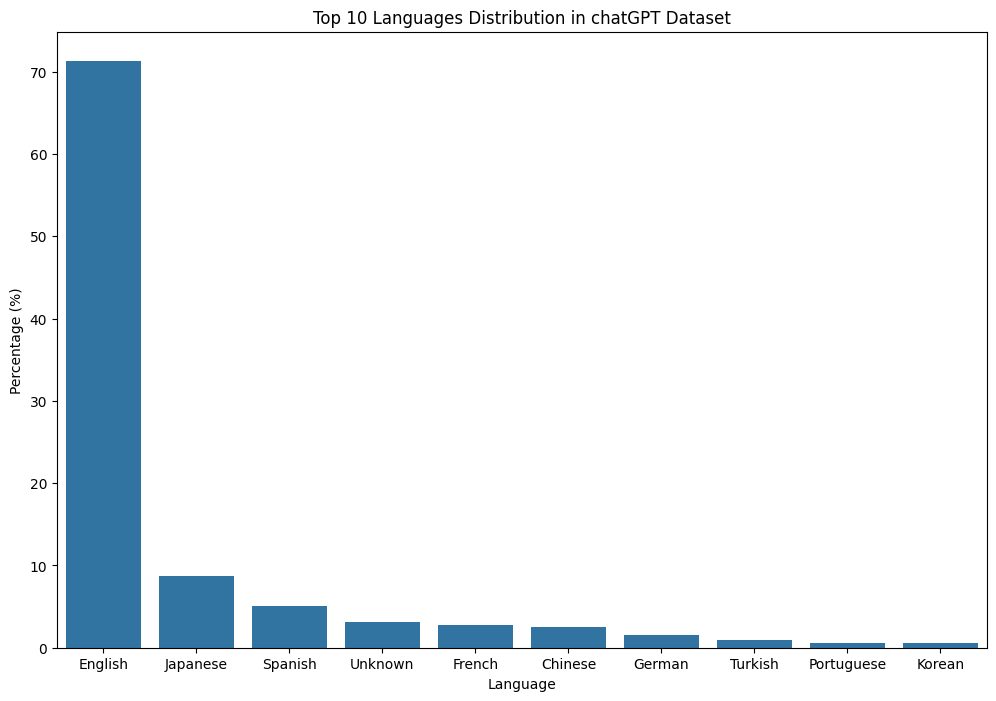

In [24]:
# Calculate the percentage of top 10 languages in the dataset
lang_percentage = df["lang_fullname"].value_counts(normalize=True).head(10) * 100

# Create a dataframe for language name and percentage of language in the dataset
df_lang = lang_percentage.reset_index()

# Create a bar plot for top 10 languages
plt.figure(figsize=(12, 8))
sns.barplot(x="lang_fullname", y="proportion", data=df_lang)

# Adding tiels and labels
plt.title("Top 10 Languages Distribution in chatGPT Dataset")
plt.xlabel("Language")
plt.ylabel("Percentage (%)")

plt.show()

### <font color="gray">Users with Most Tweets</font>

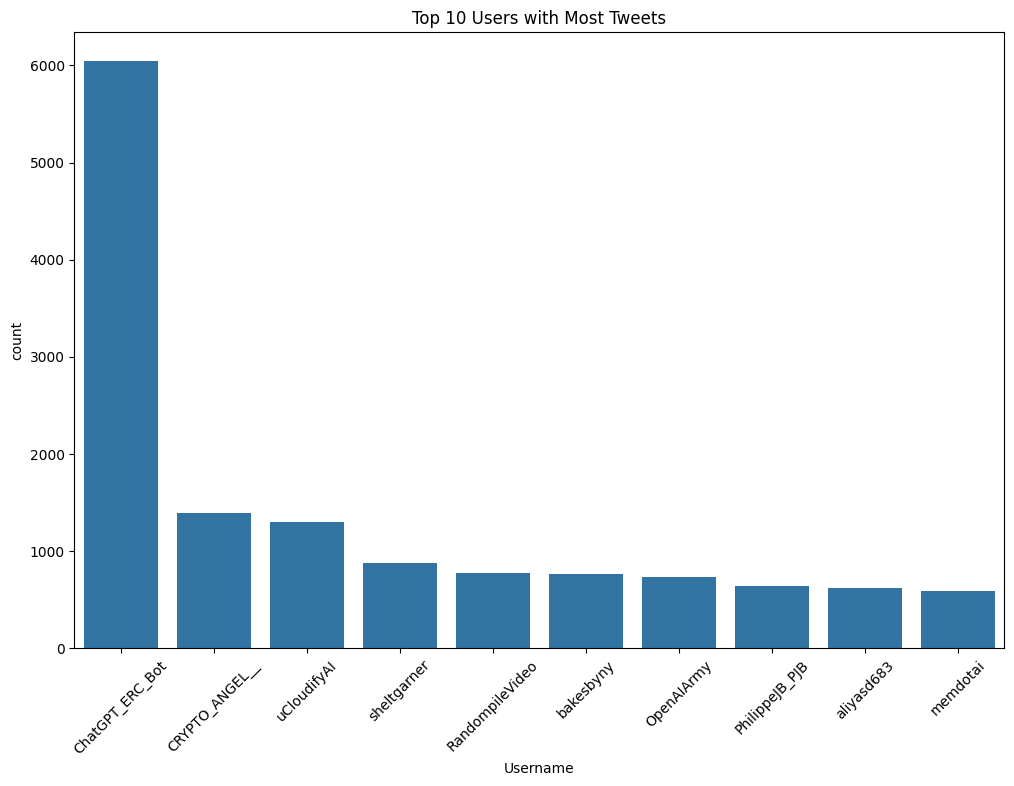

In [25]:
# Find top 10 users with most tweets
top_10_users = df["user_username"].value_counts()

# Create dataframe
df_top_10_users = top_10_users.head(10).reset_index()

# Create a bar plot for top 10 users
plt.figure(figsize=(12, 8))
sns.barplot(x="user_username", y="count", data=df_top_10_users)

# Add title and label
plt.title("Top 10 Users with Most Tweets")
plt.xlabel("Username")

plt.xticks(rotation=45)
plt.show()

### <font color="gray">Tweet Frequency over Time</font>

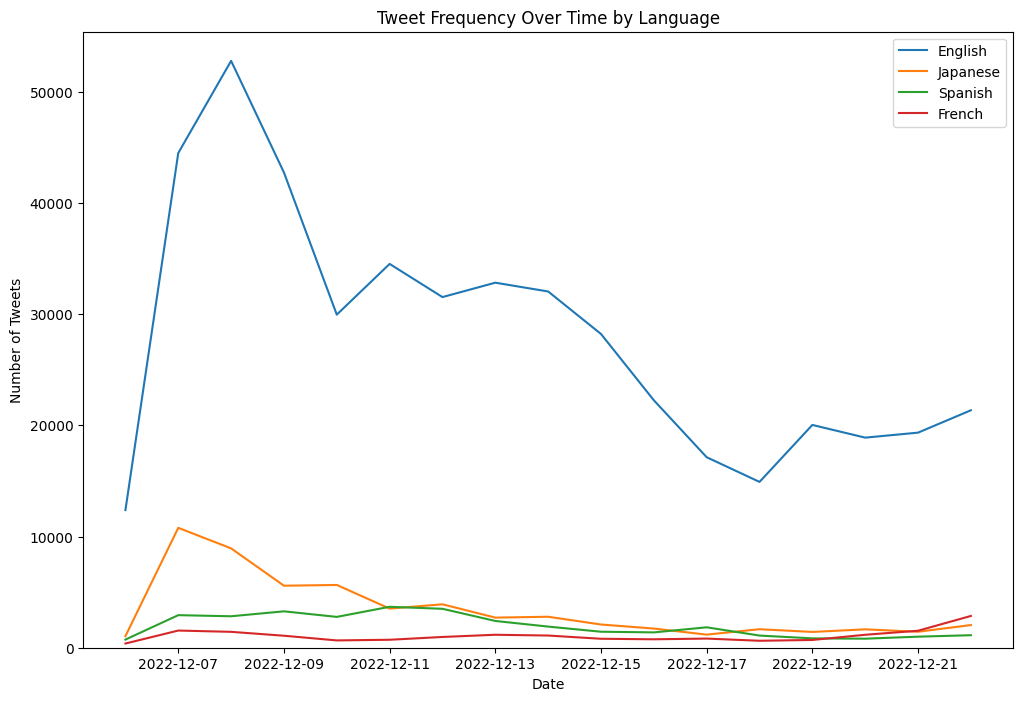

In [26]:
# Filter the DataFrame for each language
df_english = df[df["lang"] == "en"]
df_japanese = df[df["lang"] == "ja"]
df_spanish = df[df["lang"] == "es"]
df_french = df[df["lang"] == "fr"]

# Count number of daily tweets for each language
daily_tweets_en = df_english.resample("D", on="created_at").count()
daily_tweets_ja = df_japanese.resample("D", on="created_at").count()
daily_tweets_es = df_spanish.resample("D", on="created_at").count()
daily_tweets_fr = df_french.resample("D", on="created_at").count()

# Plot daily tweet frequencies for each language on the same graph
plt.figure(figsize=(12, 8))

# English Tweets
plt.plot(daily_tweets_en.index, daily_tweets_en["tweet_id"], label="English")

# Japanese Tweets
plt.plot(daily_tweets_ja.index, daily_tweets_ja["tweet_id"], label="Japanese")

# Spanish Tweets
plt.plot(daily_tweets_es.index, daily_tweets_es["tweet_id"], label="Spanish")

# French Tweets
plt.plot(daily_tweets_fr.index, daily_tweets_fr["tweet_id"], label="French")

plt.ylim(bottom=0)
plt.title("Tweet Frequency Over Time by Language")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.legend()

plt.show()


### <font color="gray">Hashtags wordcloud</font>

(-0.5, 799.5, 399.5, -0.5)

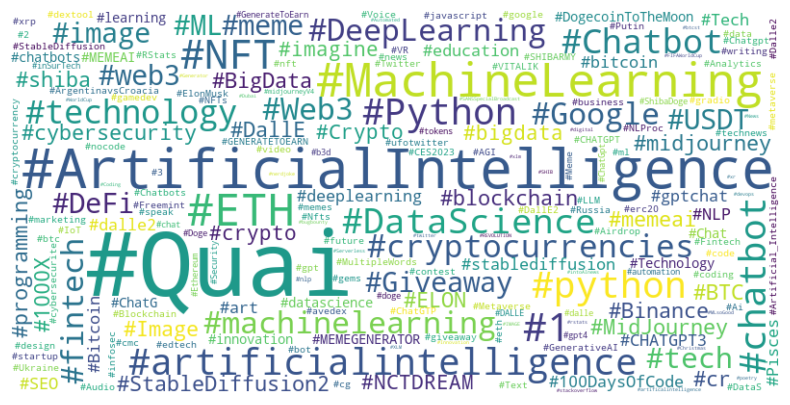

In [27]:
# Source for defaultdict: https://www.geeksforgeeks.org/defaultdict-in-python/)
freq = defaultdict(int)

# Use a for-loop to retrieve the hashtags and put them in a container
# Source: Atteveldt et al. (2022)
# Wordcloud for English hashtags
for text in df_en_cleaned["text"]:
    for tag in re.findall("#\w+", text):
        if not re.search("#ChatGPT|#chatGPT|#chatgpt|#GPT|#GPT3|#GPT4|#gpt3|#OPENAI|#OpenAI|#OpenAi|#openai|#openAI|#IA|#AI|#ai", tag):
            freq[tag]+=1
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

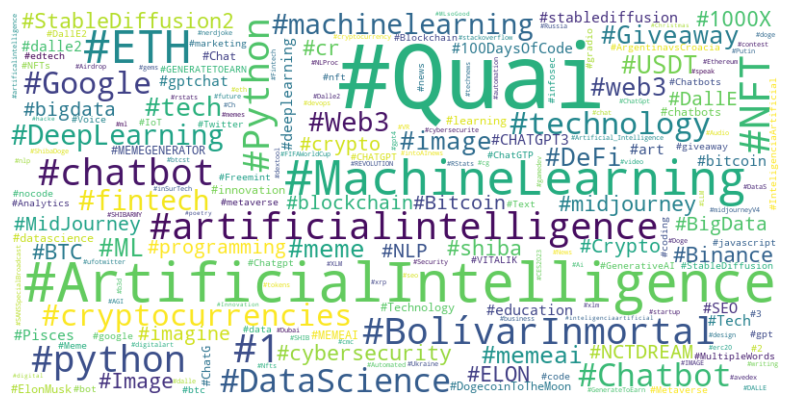

In [28]:
# Wordcloud for Spanish hashtags
for text in df_es_cleaned["text"]:
    for tag in re.findall("#\w+", text):
        if not re.search("#ChatGPT|#chatGPT|#chatgpt|#GPT|#GPT3|#GPT4|#gpt3|#OPENAI|#OpenAI|#OpenAi|#openai|#openAI|#IA|#AI|#ai", tag):
            freq[tag]+=1
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

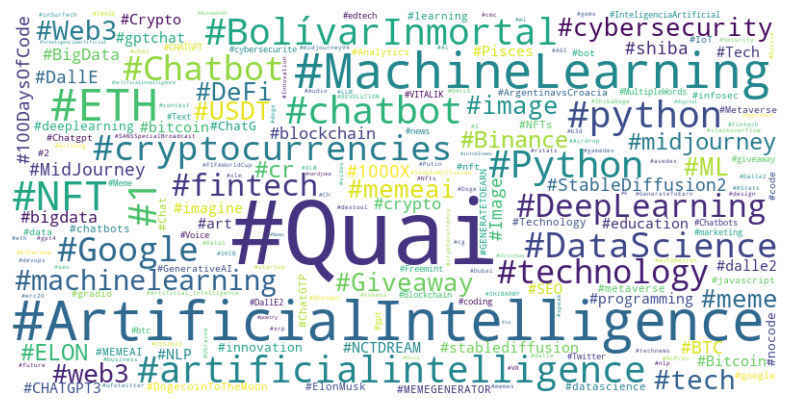

In [29]:
# Wordcloud for French hashtags
for text in df_fr_cleaned["text"]:
    for tag in re.findall("#\w+", text):
        if not re.search("#ChatGPT|#chatGPT|#chatgpt|#GPT|#GPT3|#GPT4|#gpt3|#OPENAI|#OpenAI|#OpenAi|#openai|#openAI|#IA|#AI|#ai", tag):
            freq[tag]+=1
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

### <font color="gray">Top 20 bigrams</font>

In [30]:
# Define a function to return the most frequent bigrams
def get_top_n_bigram(text, n=10):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words="english")
    bag_of_words = vectorizer.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

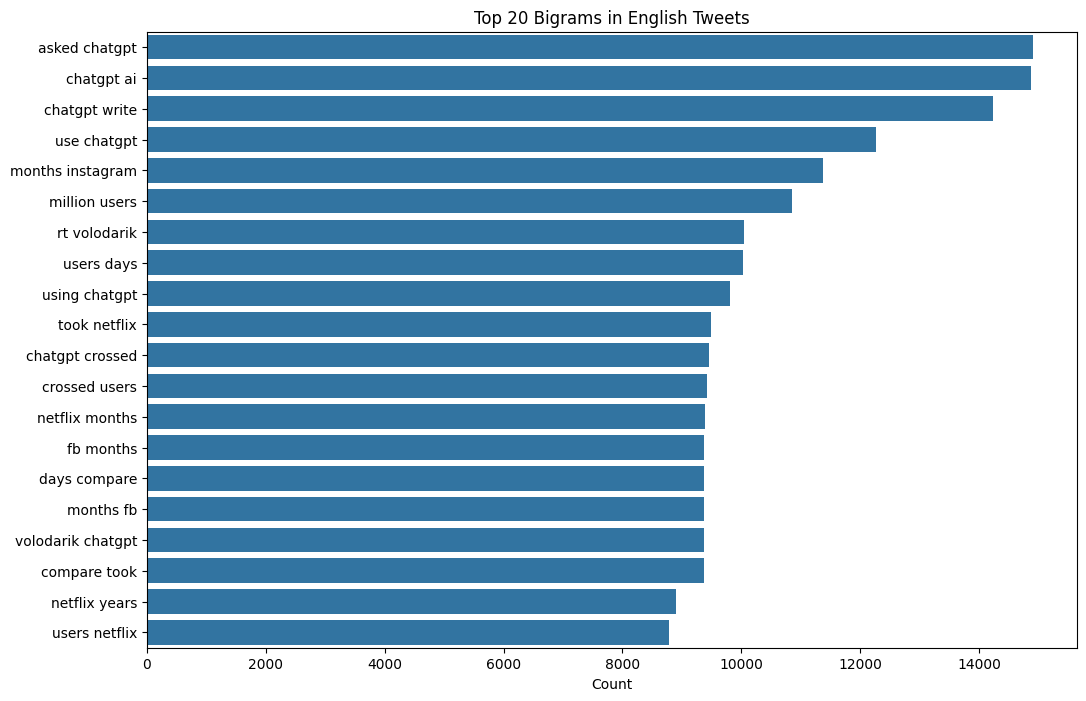

In [31]:
# Extract biagrams for English comments
bigrams = get_top_n_bigram(df_en_cleaned["text_clean"], 20)
df_bigram_freq = pd.DataFrame(bigrams, columns=["bigram", "count"])

# Plot a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="count", y="bigram", data=df_bigram_freq)

# Add title and label
plt.title("Top 20 Bigrams in English Tweets")
plt.xlabel("Count")
plt.ylabel(None)

plt.show()

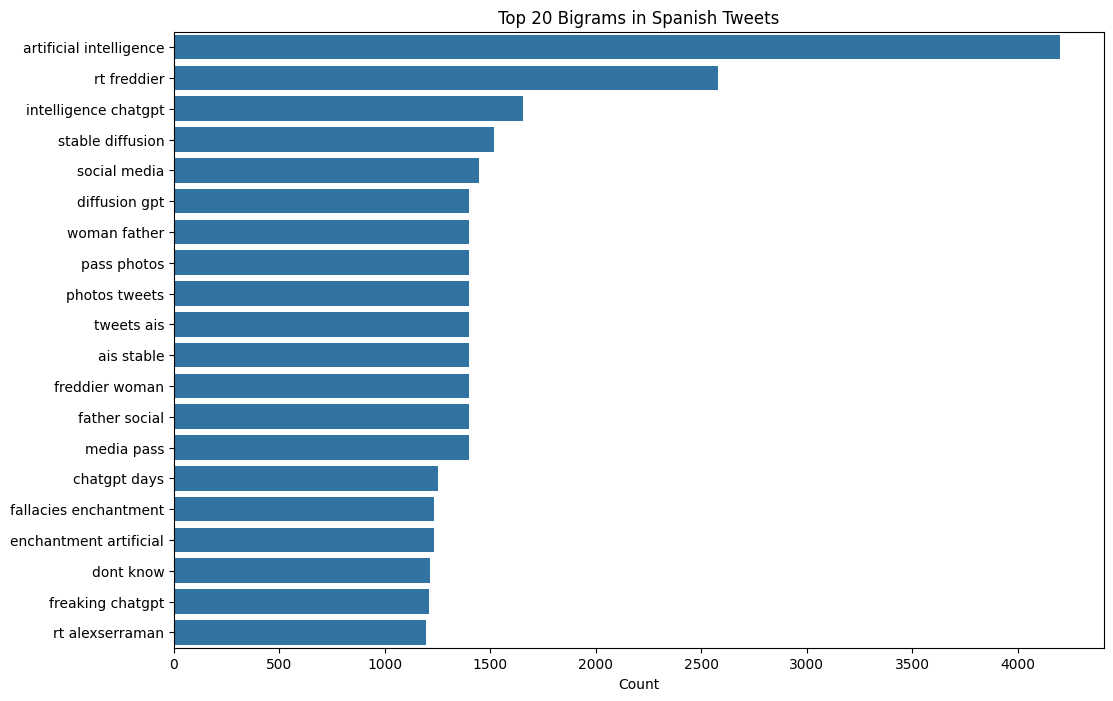

In [32]:
# Extract biagrams for Spanish comments
bigrams = get_top_n_bigram(df_es_cleaned["translation_clean"], 20)
df_bigram_freq = pd.DataFrame(bigrams, columns=["bigram", "count"])

# Plot a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="count", y="bigram", data=df_bigram_freq)

# Add title and label
plt.title("Top 20 Bigrams in Spanish Tweets")
plt.xlabel("Count")
plt.ylabel(None)

plt.show()

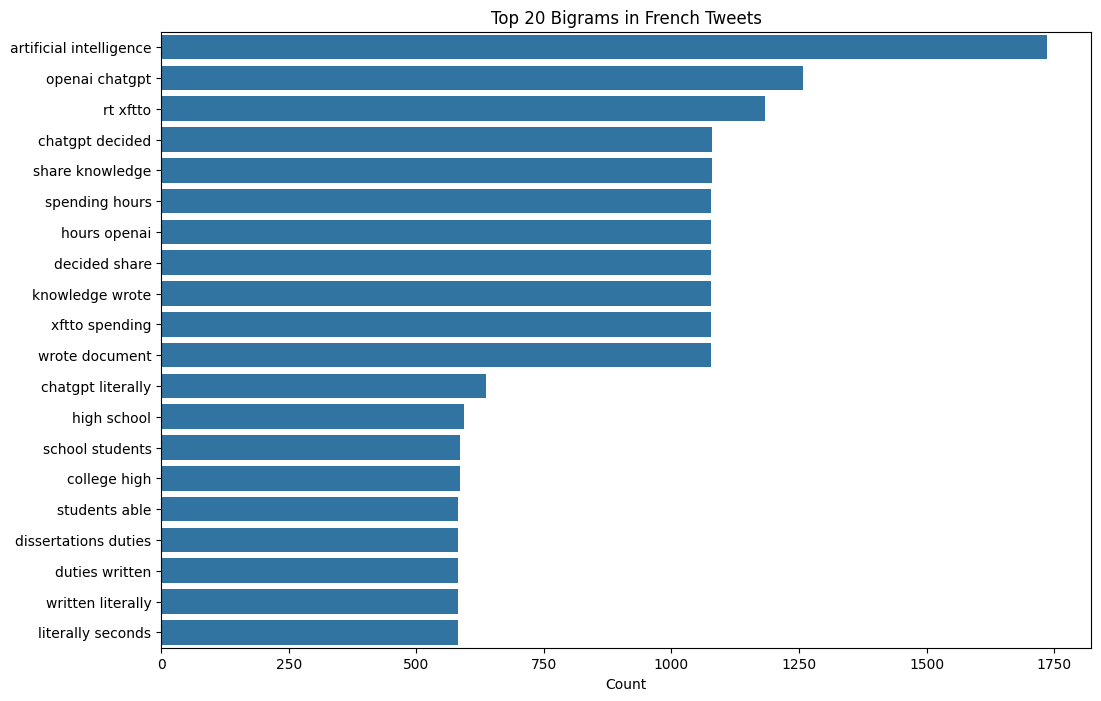

In [33]:
# Extract biagrams for French comments
bigrams = get_top_n_bigram(df_fr_cleaned["translation_clean"], 20)
df_bigram_freq = pd.DataFrame(bigrams, columns=["bigram", "count"])

# Plot a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="count", y="bigram", data=df_bigram_freq)

# Add title and label
plt.title("Top 20 Bigrams in French Tweets")
plt.xlabel("Count")
plt.ylabel(None)

plt.show()

### <font color="gray">Most Frequent Retweet</font>

In [34]:
text_frequency = df_en_cleaned["text"].value_counts()

# Get the index of the most frequent text
most_frequent_text = text_frequency.idxmax()

print("Most frequent Retweet:", most_frequent_text)
print()
print("Frequency:", text_frequency[most_frequent_text])

Most frequent Retweet: RT @volodarik: ChatGPT has crossed 1M+ users in just 5 days. 

To compare, it took Netflix 41 months, FB - 10 months, and Instagram - 2.5 m…

Frequency: 9349


<a id='#4.-Model-Training-and-Evaluation'></a>
## 4. Model Training and Evaluation

### <font color="gray">Unsupervised Sentiment Analysis using Vader (Valence Aware Dictionary for sEntiment Reasoning)</font>

In [35]:
nltk.download("vader_lexicon")

# Initiate the vader sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### English

In [36]:
# Apply Vader on text column
df_en_cleaned["vader_score"] = df_en_cleaned["text"].map(
    lambda text: sia.polarity_scores(text)["compound"])

In [37]:
df_en_cleaned["vader_score"].describe()

count    475418.000000
mean          0.186679
std           0.385135
min          -0.978600
25%           0.000000
50%           0.025800
75%           0.476700
max           0.992000
Name: vader_score, dtype: float64

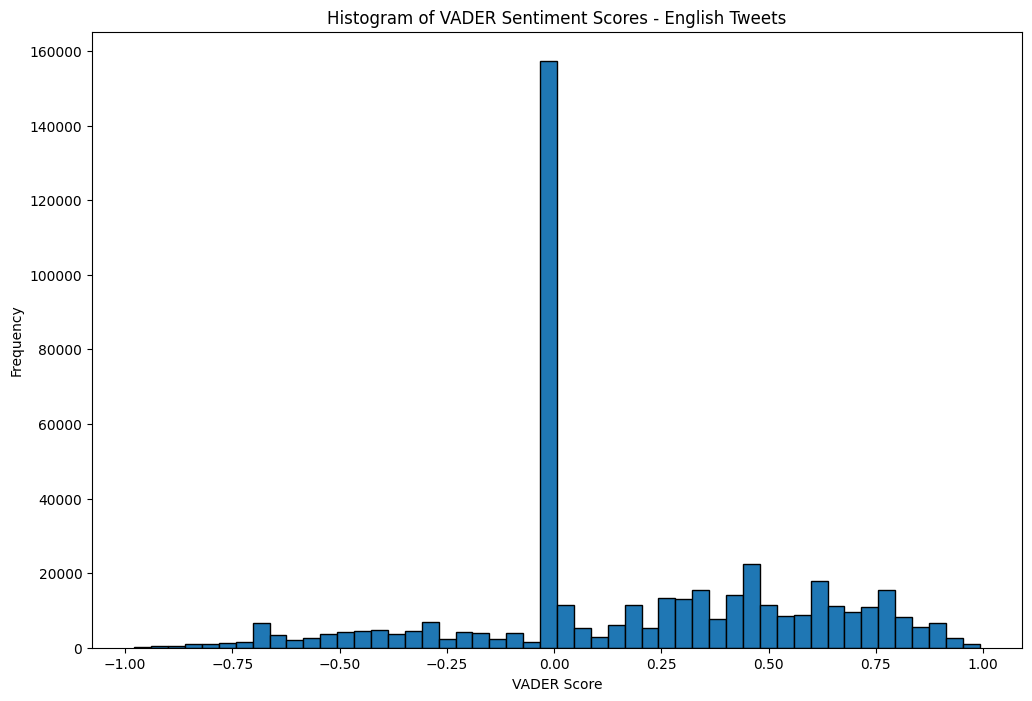

In [38]:
# Plot the histogram of the VADER scores
plt.figure(figsize=(12, 8))
plt.hist(df_en_cleaned["vader_score"], bins=50, edgecolor="black")

# Add titles and labels
plt.title("Histogram of VADER Sentiment Scores - English Tweets")
plt.xlabel("VADER Score")
plt.ylabel("Frequency")

plt.show()

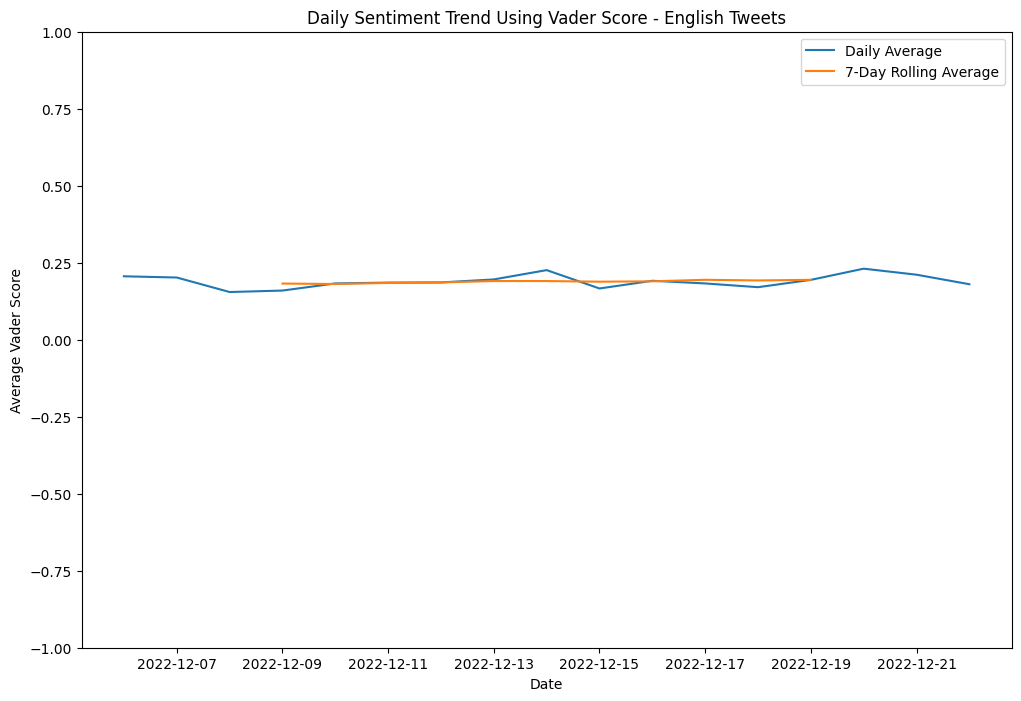

In [40]:
# Set indext to date column (created_at)
df_en_cleaned.set_index("created_at", inplace=True)

# Daily mean of VADER score
daily_sentiment = df_en_cleaned["vader_score"].resample("D").mean()

# Rolling average for a smoother line
rolling_sentiment = daily_sentiment.rolling(window=7, center=True).mean()

# Plot the daily average sentiment score
plt.figure(figsize=(12, 8))
sns.lineplot(data=daily_sentiment, label="Daily Average")
sns.lineplot(data=rolling_sentiment, label="7-Day Rolling Average")
plt.title("Daily Sentiment Trend Using Vader Score - English Tweets")
plt.ylim([-1, 1])
plt.xlabel("Date")
plt.ylabel("Average Vader Score")
plt.legend()
plt.show()

#### Spanish

In [41]:
# Apply Vader on text column
df_es["vader_score"] = df_es["translation"].map(
    lambda text: sia.polarity_scores(text)["compound"])

In [42]:
df_es["vader_score"].describe()

count    33543.000000
mean         0.173931
std          0.383196
min         -0.970900
25%          0.000000
50%          0.202300
75%          0.476700
max          0.983400
Name: vader_score, dtype: float64

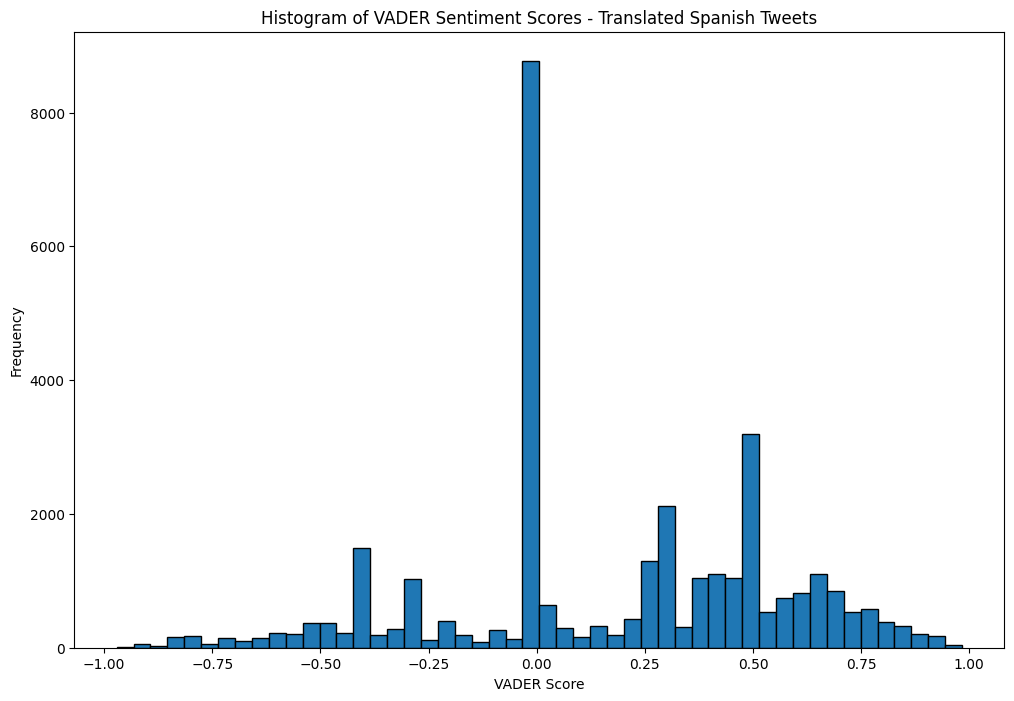

In [43]:
# Plot the histogram of the VADER scores
plt.figure(figsize=(12, 8))
plt.hist(df_es["vader_score"], bins=50, edgecolor="black")

# Add titles and labels
plt.title("Histogram of VADER Sentiment Scores - Translated Spanish Tweets")
plt.xlabel("VADER Score")
plt.ylabel("Frequency")

plt.show()

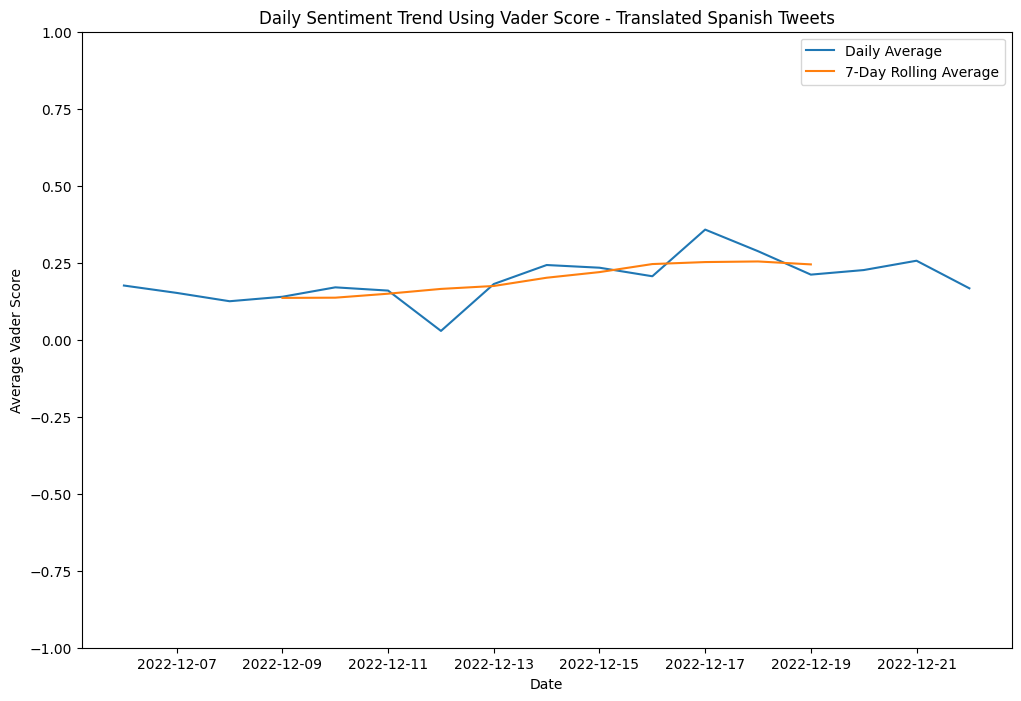

In [44]:
# Set indext to date column (created_at)
df_es.set_index("created_at", inplace=True)

# Daily mean of VADER score
daily_sentiment = df_es["vader_score"].resample("D").mean()

# Rolling average for a smoother line
rolling_sentiment = daily_sentiment.rolling(window=7, center=True).mean()

# Plot the daily average sentiment score
plt.figure(figsize=(12, 8))
sns.lineplot(data=daily_sentiment, label="Daily Average")
sns.lineplot(data=rolling_sentiment, label="7-Day Rolling Average")
plt.title("Daily Sentiment Trend Using Vader Score - Translated Spanish Tweets")
plt.ylim([-1, 1])
plt.xlabel("Date")
plt.ylabel("Average Vader Score")
plt.legend()
plt.show()

#### French

In [45]:
# Apply Vader on text column
df_fr["vader_score"] = df_fr["translation"].map(
    lambda text: sia.polarity_scores(text)["compound"])

In [46]:
df_fr["vader_score"].describe()

count    18286.000000
mean         0.193473
std          0.366922
min         -0.960500
25%          0.000000
50%          0.000000
75%          0.476700
max          0.992200
Name: vader_score, dtype: float64

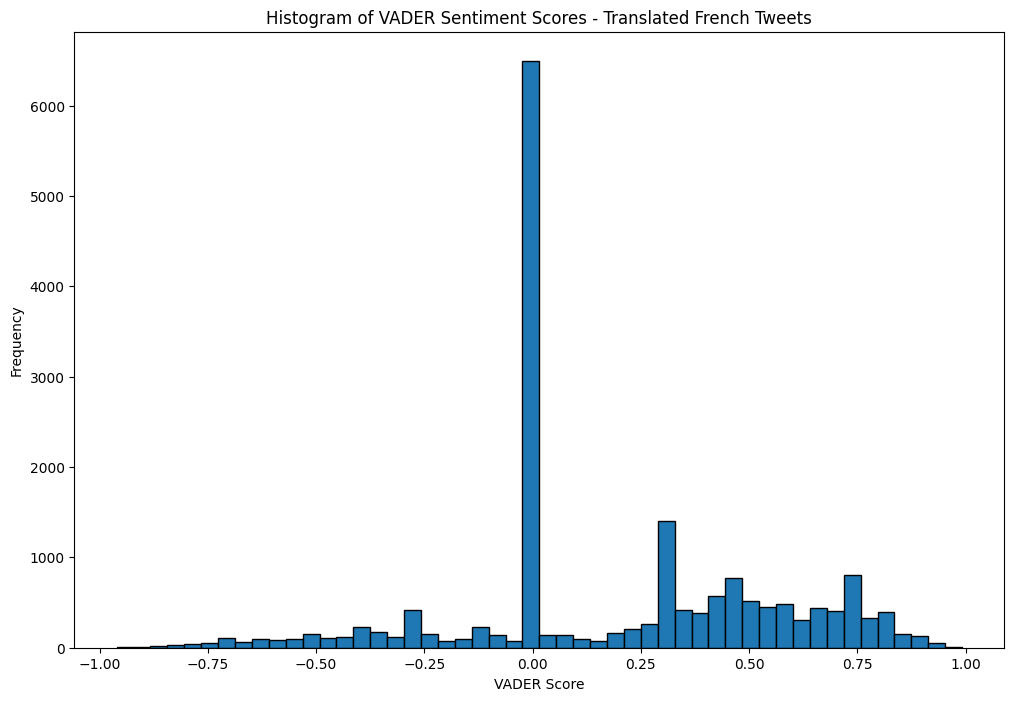

In [47]:
# Plot the histogram of the VADER scores
plt.figure(figsize=(12, 8))
plt.hist(df_fr["vader_score"], bins=50, edgecolor="black")

# Add titles and labels
plt.title("Histogram of VADER Sentiment Scores - Translated French Tweets")
plt.xlabel("VADER Score")
plt.ylabel("Frequency")

plt.show()

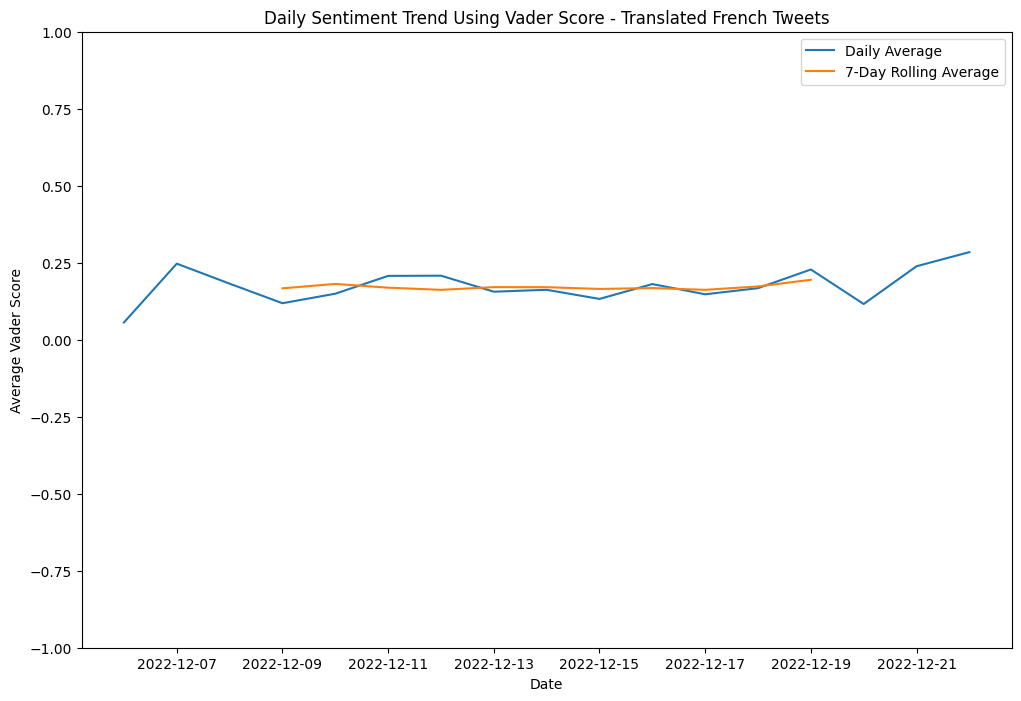

In [48]:
# Set indext to date column (created_at)
df_fr.set_index("created_at", inplace=True)

# Daily mean of VADER score
daily_sentiment = df_fr["vader_score"].resample("D").mean()

# Rolling average for a smoother line
rolling_sentiment = daily_sentiment.rolling(window=7, center=True).mean()

# Plot the daily average sentiment score
plt.figure(figsize=(12, 8))
sns.lineplot(data=daily_sentiment, label="Daily Average")
sns.lineplot(data=rolling_sentiment, label="7-Day Rolling Average")
plt.title("Daily Sentiment Trend Using Vader Score - Translated French Tweets")
plt.ylim([-1, 1])
plt.xlabel("Date")
plt.ylabel("Average Vader Score")
plt.legend()
plt.show()

### <font color="gray">K-means</font>

#### English

In [49]:
# Extract features with TF-IDF
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df_en_cleaned["text_clean"]).toarray()

In [50]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X)

c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

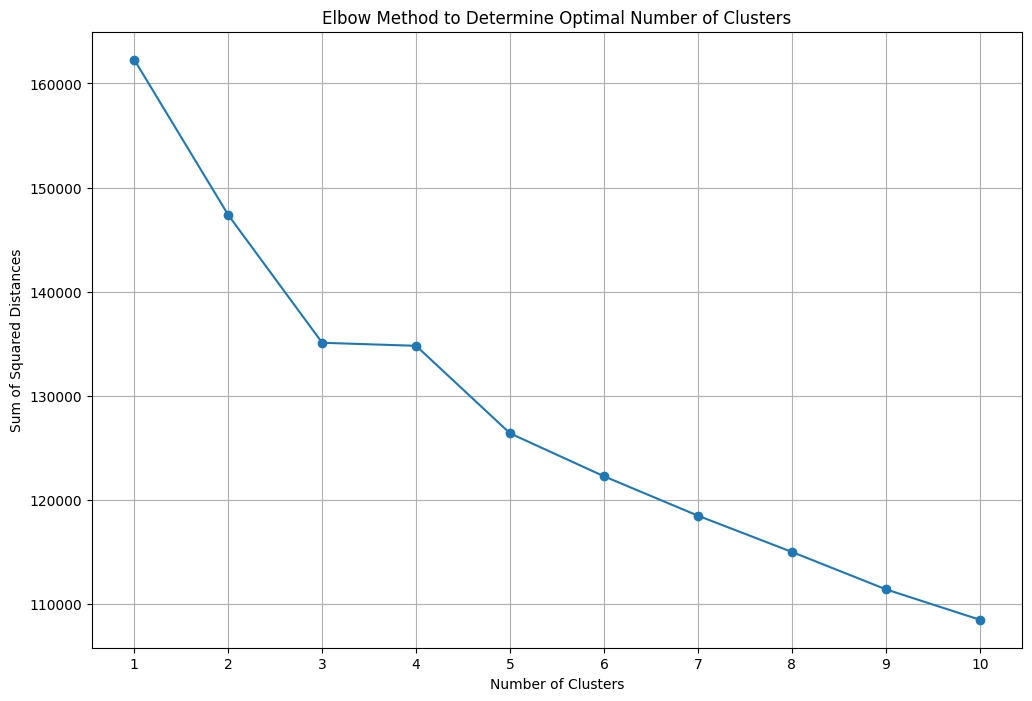

In [51]:
# Use a range of k values to find the optimal k
k_values = np.arange(1, 11)
inertia_values = []

for k in list(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    inertia_values.append(kmeans.inertia_)


# Plot the Elbow graph
plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia_values, "-o")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [52]:
# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


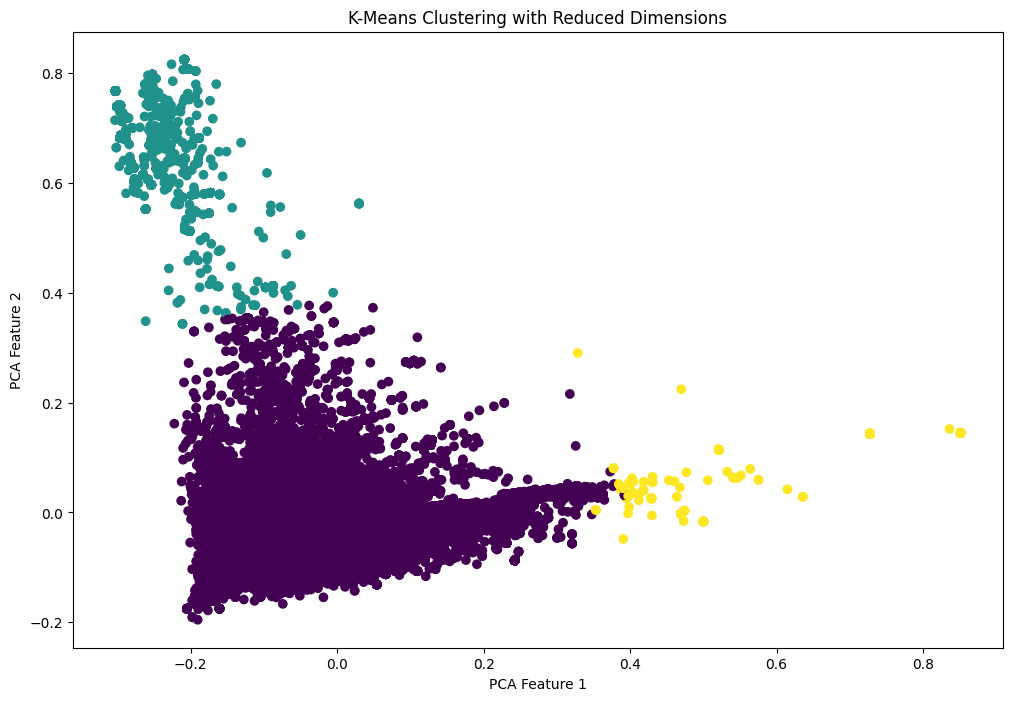

In [53]:
plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters)
plt.title('K-Means Clustering with Reduced Dimensions')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

In [54]:
# Calculate Silhouette score for the clustering
silhouette_avg = silhouette_score(X_reduced, clusters)

print(f"The average Silhouette score for the clustering is: {silhouette_avg:.3f}")

The average Silhouette score for the clustering is: 0.331


### <font color="gray"> Study the Distribution of Vader Score for Each Cluster - English Tweet</font>

In [55]:
# Add the cluster labels to the dataset
df_en_cleaned["cluster"] = clusters

df_en_cleaned["cluster"].value_counts(normalize=True)

cluster
0    0.912549
2    0.048263
1    0.039189
Name: proportion, dtype: float64

The Mean of Vader Score in Cluster 0 is:  0.204



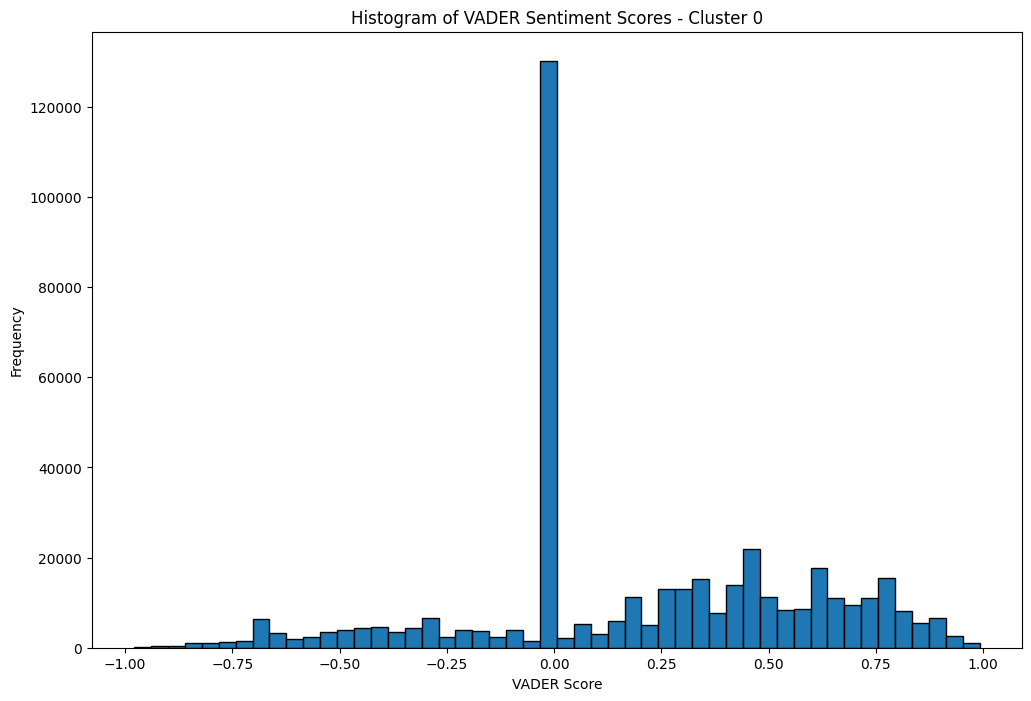

In [56]:
# Cluster 0 - 0.039 of data

cluster_zero = df_en_cleaned[df_en_cleaned["cluster"] == 0]

print(f"The Mean of Vader Score in Cluster 0 is: {cluster_zero['vader_score'].mean(): .3f}\n")

# Plot the histogram of the VADER scores
plt.figure(figsize=(12, 8))
plt.hist(cluster_zero["vader_score"], bins=50, edgecolor="black")

# Add titles and labels
plt.title("Histogram of VADER Sentiment Scores - Cluster 0")
plt.xlabel("VADER Score")
plt.ylabel("Frequency")

plt.show()

The Mean of Vader Score in Cluster 1 is:  0.012



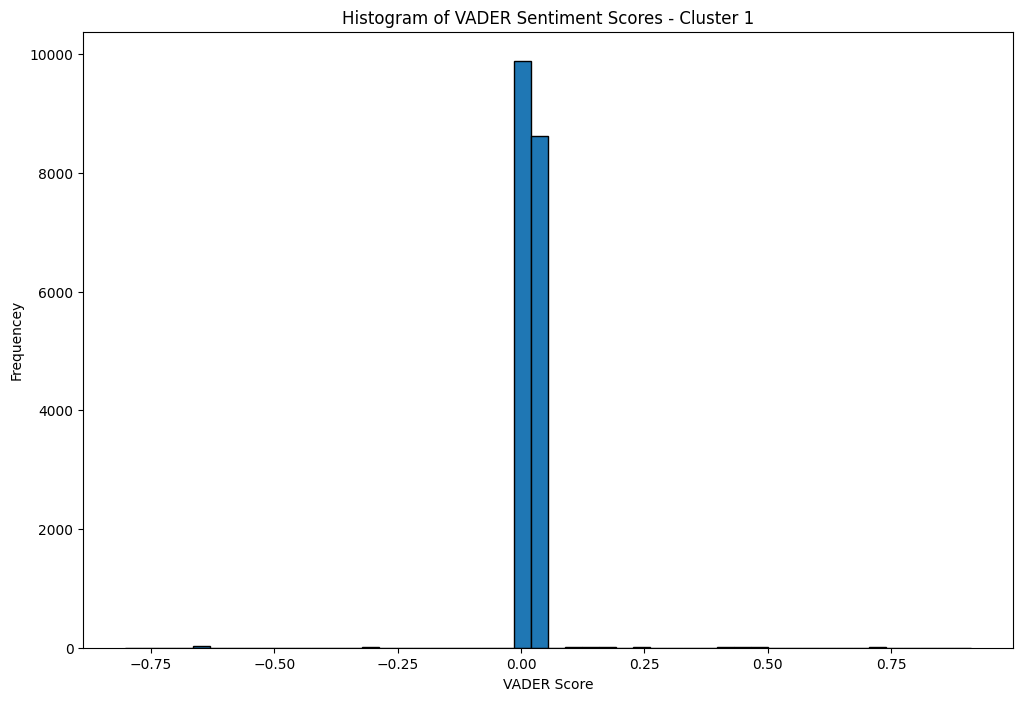

In [57]:
# Cluster 1 - 0.048 of data

cluster_one = df_en_cleaned[df_en_cleaned["cluster"] == 1]

print(f"The Mean of Vader Score in Cluster 1 is: {cluster_one['vader_score'].mean(): .3f}\n")

# Plot the histogram of the VADER scores
plt.figure(figsize=(12, 8))
plt.hist(cluster_one["vader_score"], bins=50, edgecolor="black")

# Add title and labels
plt.title("Histogram of VADER Sentiment Scores - Cluster 1")
plt.xlabel("VADER Score")
plt.ylabel("Frequencey")

plt.show()

The Mean of Vader Score in Cluster 2 is:  0.005



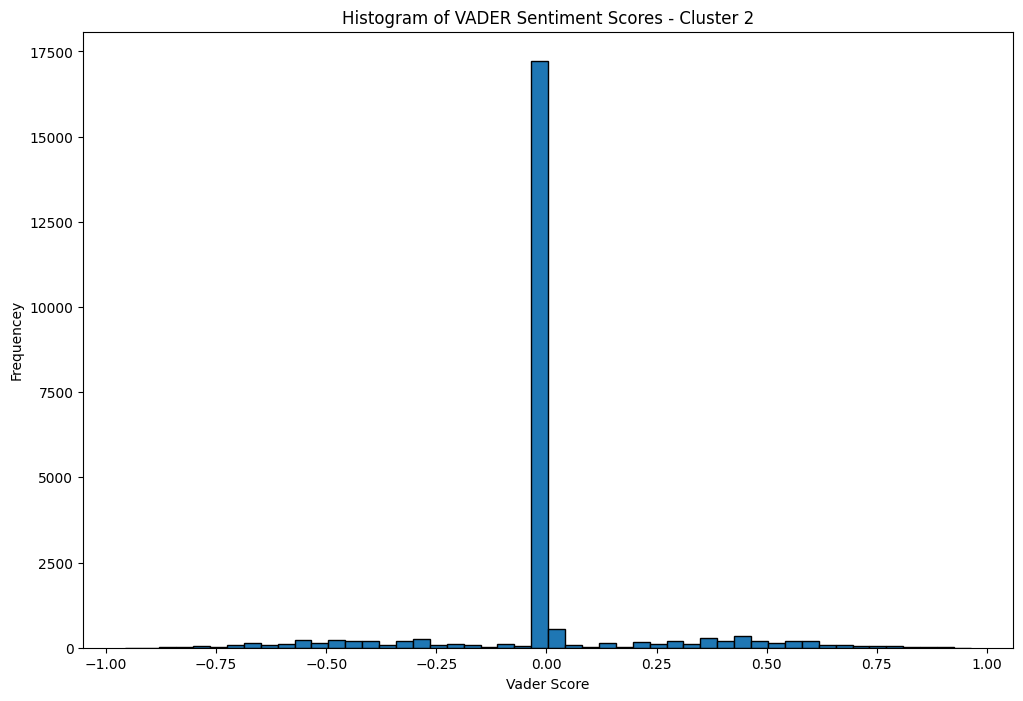

In [58]:
# Cluster 2  - 0.913 of data

cluster_two = df_en_cleaned[df_en_cleaned["cluster"] == 2]

print(f"The Mean of Vader Score in Cluster 2 is: {cluster_two['vader_score'].mean(): .3f}\n")

# Plot the Histogram of VADER Scores
plt.figure(figsize=(12, 8))
plt.hist(cluster_two["vader_score"], bins=50, edgecolor="black")

# Add title and labels
plt.title("Histogram of VADER Sentiment Scores - Cluster 2")
plt.xlabel("Vader Score")
plt.ylabel("Frequencey")

plt.show()

#### Spanish

In [59]:
# Extract features with TF-IDF
X = tfidf.fit_transform(df_es_cleaned["translation_clean"]).toarray()

In [60]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X)

c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

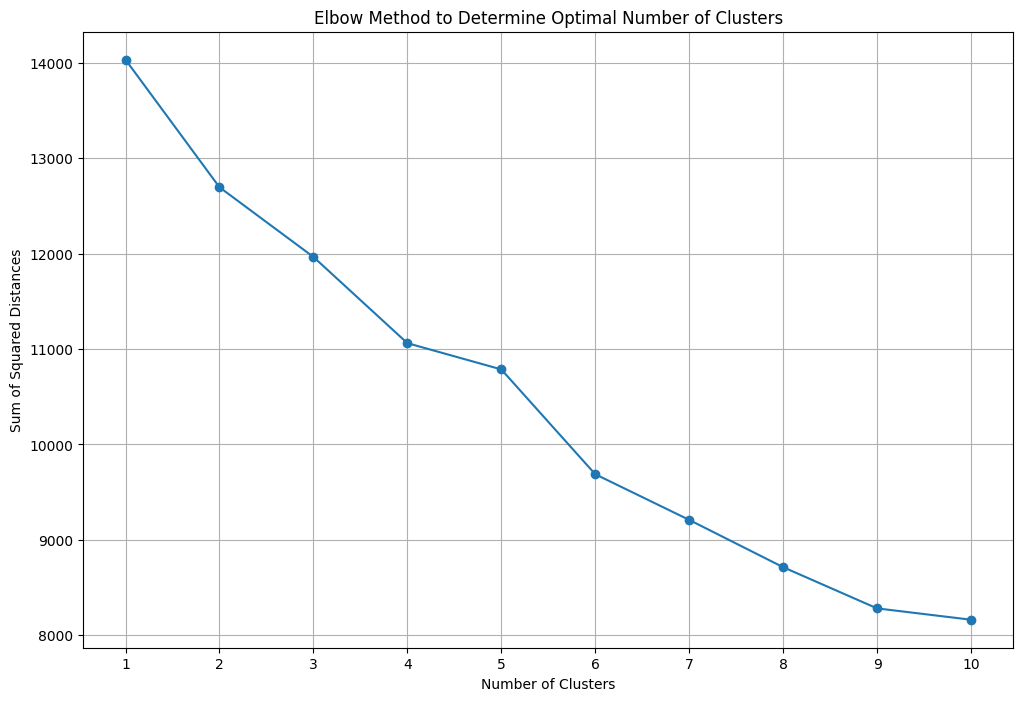

In [61]:
# Use a range of k values to find the optimal k
k_values = np.arange(1, 11)
inertia_values = []

for k in list(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    inertia_values.append(kmeans.inertia_)


# Plot the Elbow graph
plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia_values, "-o")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [62]:
# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


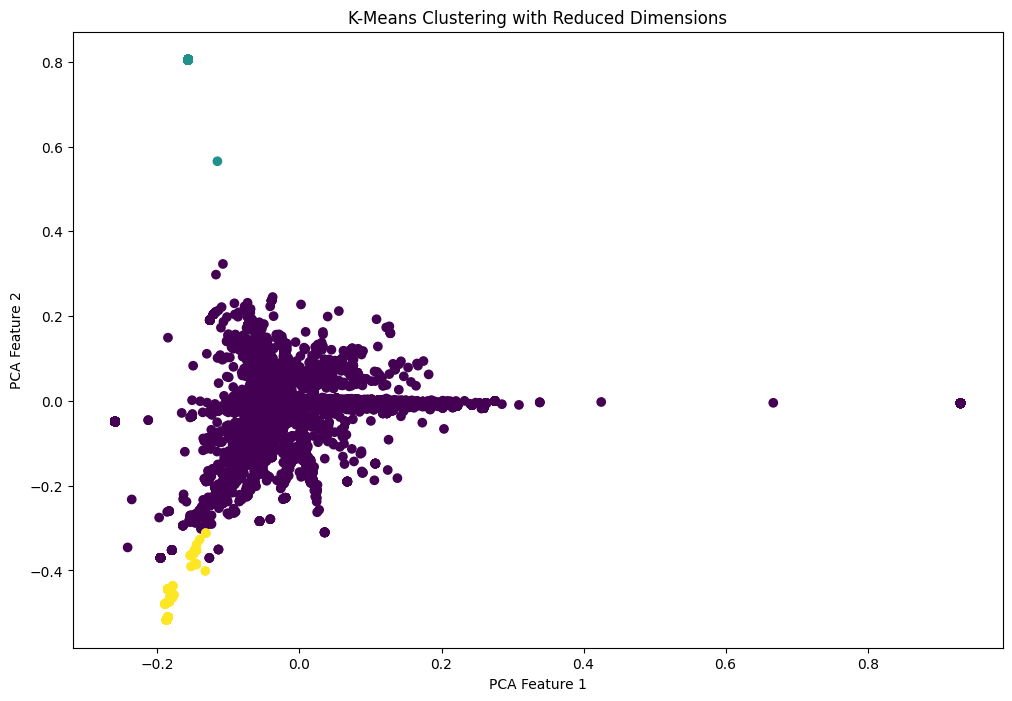

In [63]:
plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters)
plt.title('K-Means Clustering with Reduced Dimensions')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

#### French

In [64]:
# Extract features with TF-IDF
X = tfidf.fit_transform(df_fr_cleaned["translation_clean"]).toarray()

In [65]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X)

c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

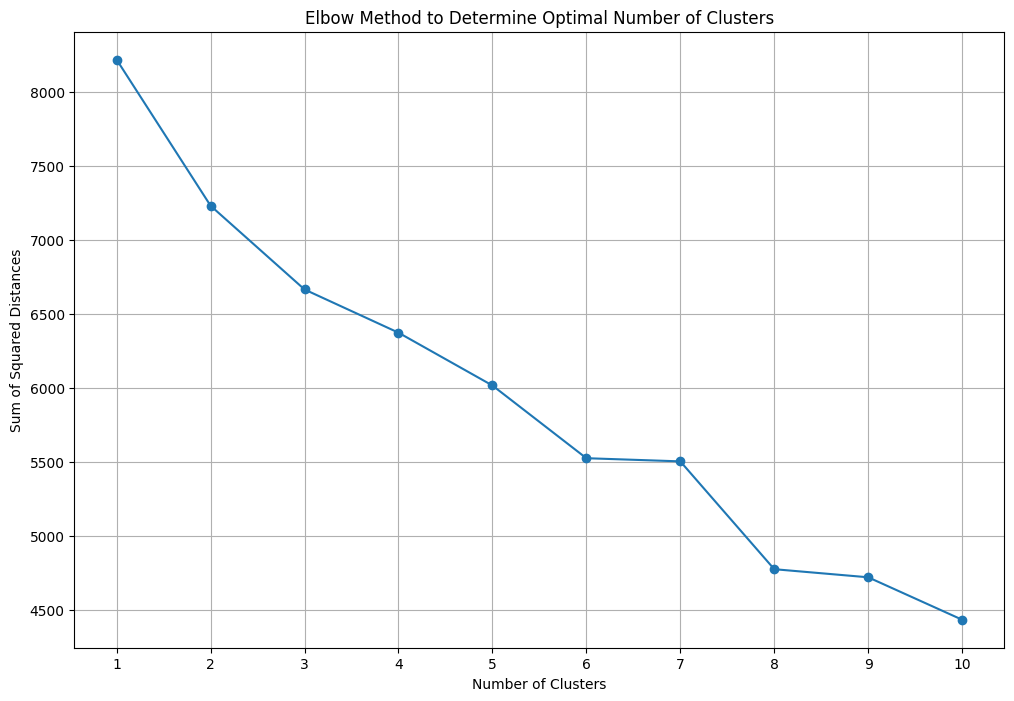

In [66]:
# Use a range of k values to find the optimal k
k_values = np.arange(1, 11)
inertia_values = []

for k in list(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    inertia_values.append(kmeans.inertia_)


# Plot the Elbow graph
plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia_values, "-o")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [67]:
# Apply K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

c:\Users\giuli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


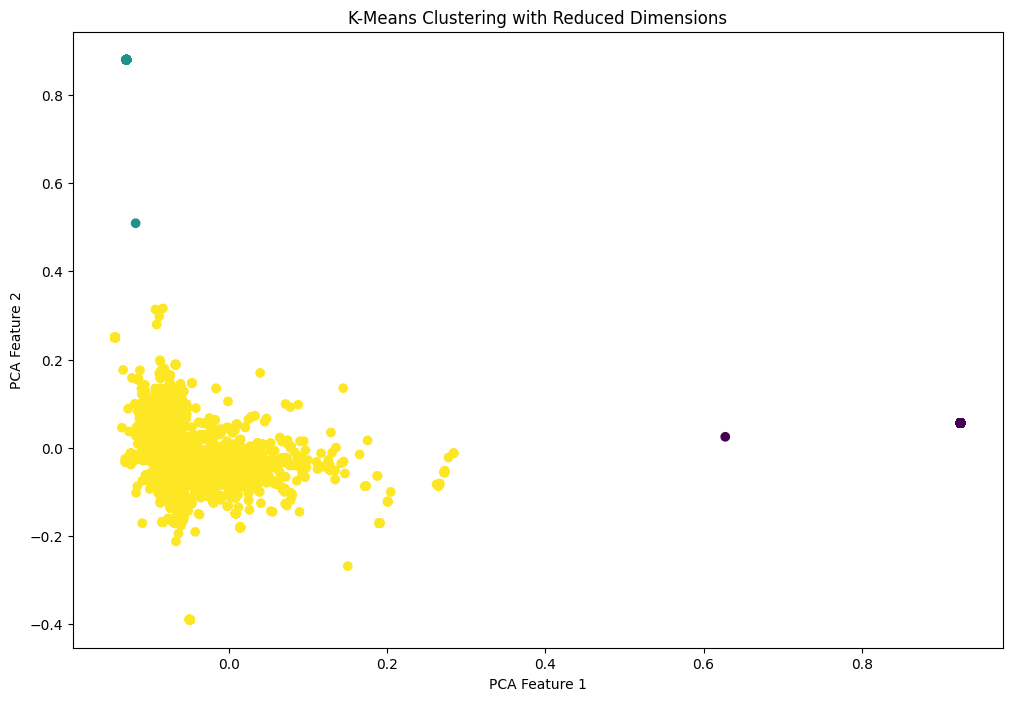

In [68]:
plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters)
plt.title('K-Means Clustering with Reduced Dimensions')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

<a id='#5.-Network-Analysis'></a>
## 5. Network Analysis

In [69]:
G = nx.DiGraph()

for index, row in df_en_cleaned.iterrows():
    if row["sourcetweet_type"] == "retweeted":
        # Add an edge from the author of the original tweet to the retweeter
        G.add_edge(row["sourcetweet_text"], row["text"])

In [70]:
# calculate the degree centrality
degree_centrality = nx.degree_centrality(G)

In [71]:
# Find the node with the highest degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)
max_degree_value = degree_centrality[max_degree_node]

print(max_degree_node)
print()
print(max_degree_value)

RT @techreview: A chatbot version of GPT-3 that admits its mistakes is more transparent than the original. But it’s still not perfect. http…

9.872085971765834e-05


<a id='#6.-Topic-Modelling'></a>
## 6. Topic Modelling

#### English

In [72]:
# Extra cleaning for the topic modeling
# Removing words that are expected in this dataset but don't hold any aditional value.
# Examples: chatGPT, openAI.
df_en_cleaned_rm = df_en_cleaned.copy()
remove_words = ["chatgpt", "openai", "rt", "open", "ai", "gpt", "gpt-3"]
df_en_cleaned_rm['text_clean'] = df_en_cleaned_rm['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (remove_words)]))

In [73]:
# create a function to combine all the sentences into a single list of words
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_en_cleaned_rm.text_clean.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['rushhour', 'wallet', 'data', 'tracking', 'analytics', 'integrated', 'toshi']


In [74]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [75]:
# number of topics
num_topics = 40

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(20,
  '0.023*"video" + 0.013*"using" + 0.012*"tweet" + 0.010*"made" + '
  '0.009*"report" + 0.009*"light" + 0.008*"research" + 0.008*"lik" + '
  '0.008*"write" + 0.008*"told"'),
 (13,
  '0.037*"billion" + 0.019*"whats" + 0.014*"raised" + 0.013*"musk" + '
  '0.011*"elon" + 0.010*"like" + 0.008*"pretty" + 0.006*"sure" + '
  '0.006*"others" + 0.006*"can"'),
 (15,
  '0.039*"alliekmiller" + 0.024*"amp" + 0.017*"costing" + 0.015*"want" + '
  '0.015*"system" + 0.013*"high" + 0.013*"like" + 0.010*"says" + '
  '0.008*"mcuban" + 0.008*"school"'),
 (25,
  '0.069*"fb" + 0.033*"compare" + 0.015*"game" + 0.011*"quality" + '
  '0.009*"machine" + 0.009*"articulation" + 0.009*"changer" + 0.008*"google" + '
  '0.007*"responses" + 0.007*"using"'),
 (14,
  '0.053*"chat" + 0.051*"bot" + 0.021*"first" + 0.014*"introducing" + '
  '0.013*"happy" + 0.013*"free" + 0.012*"created" + 0.011*"twitter" + '
  '0.011*"well" + 0.010*"eth"'),
 (29,
  '0.020*"chatbot" + 0.018*"weekend" + 0.014*"tools" + 0.013*"playing"

#### Spanish

In [79]:
# Extra cleaning for the topic modeling
# Removing words that are expected in this dataset but don't hold any aditional value.
# Examples: chatGPT, openAI.
df_en_cleaned_rm_es = df_es_cleaned.copy()
remove_words = ["chatgpt", "openai", "rt", "open", "ai", "gpt", "gpt-3"]
df_en_cleaned_rm_es['translation_clean'] = df_en_cleaned_rm_es['translation_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (remove_words)]))

In [80]:
# check the data
df_en_cleaned_rm_es.head(1)

,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang,lang_fullname,translation,translation_clean,translation_tokenized
0,1600201226670440474,"@JPA_APJ ¿Alguna vez pensaste que tendrías algo como ChatGPT? Yo que tú no sería tan escéptico. Yo visto lo visto, no lo descartaría.",214220565,antramcs,2022-12-06 18:51:17+00:00,NaN,NaN,es,Spanish,"@Jpa_apj Did you ever think you would have something like chatgpt? I would not be so skeptical. I seen what was seen, I would not rule it out.",jpaapj ever think would something like would skeptical seen seen would rule,"[jpaapj, ever, think, would, something, like, chatgpt, would, skeptical, seen, seen, would, rule]"


In [82]:
# create a function to combine all the sentences into a single list of words
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_en_cleaned_rm_es.translation_clean.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['jpaapj', 'ever', 'think', 'would', 'something', 'like', 'would', 'skeptical', 'seen', 'seen', 'would', 'rule']


In [83]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 3)]


In [84]:
# number of topics
num_topics = 40

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(2,
  '0.017*"see" + 0.015*"intelligence" + 0.015*"know" + 0.014*"artificial" + '
  '0.014*"people" + 0.014*"using" + 0.014*"dont" + 0.013*"months" + '
  '0.013*"years" + 0.011*"loogic"'),
 (18,
  '0.036*"freddier" + 0.032*"find" + 0.032*"stable" + 0.032*"diffusion" + '
  '0.032*"pass" + 0.032*"media" + 0.032*"father" + 0.032*"photos" + '
  '0.032*"tweets" + 0.032*"woman"'),
 (5,
  '0.012*"artificial" + 0.011*"intelligence" + 0.010*"freddier" + '
  '0.010*"already" + 0.007*"new" + 0.006*"asked" + 0.006*"use" + 0.006*"ask" + '
  '0.006*"programmers" + 0.005*"well"'),
 (23,
  '0.021*"artificial" + 0.021*"intelligence" + 0.011*"see" + 0.010*"know" + '
  '0.009*"google" + 0.008*"fallacies" + 0.008*"enchantment" + 0.007*"dont" + '
  '0.006*"https" + 0.006*"bolivarinmortal"'),
 (19,
  '0.015*"already" + 0.013*"freddier" + 0.008*"think" + 0.008*"know" + '
  '0.008*"come" + 0.006*"said" + 0.006*"last" + 0.006*"everything" + '
  '0.006*"dont" + 0.005*"see"'),
 (34,
  '0.014*"artificial" + 0.01

#### French

In [87]:
# Extra cleaning for the topic modeling
# Removing words that are expected in this dataset but don't hold any aditional value.
# Examples: chatGPT, openAI.
df_en_cleaned_rm_fr = df_fr_cleaned.copy()
remove_words = ["chatgpt", "openai", "rt", "open", "ai", "gpt", "gpt-3"]
df_en_cleaned_rm_fr['translation_clean'] = df_en_cleaned_rm_fr['translation_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (remove_words)]))

In [88]:
# check the data
df_en_cleaned_rm_fr.head(1)

,tweet_id,text,author_id,user_username,created_at,sourcetweet_type,sourcetweet_text,lang,lang_fullname,translation,translation_clean,translation_tokenized
0,1600199922099245056,RT @ChanPerco: C'est quoi ChatGPT ? On a laissé ChatGPT répondre à la question.\r\nChatGPT est la dernière expérimentation d’OpenAI : un outil…,913071463397289985,dentsuaegisfr,2022-12-06 18:46:06+00:00,retweeted,C'est quoi ChatGPT ? On a laissé ChatGPT répondre à la question.\r\nChatGPT est la dernière expérimentation d’OpenAI : un outil conversationnel en langage naturel qui va produire des réponses et des textes via @Numerama https://t.co/gIN75v4End https://t.co/V2Oh73mKSx,fr,French,RT @chanperco: what is Chatgpt? We let Chatgpt answer the question.\nChatgpt is the last OpenAi experiment: a tool ...,chanperco let answer question last experiment tool,"[rt, chanperco, chatgpt, let, chatgpt, answer, question, chatgpt, last, openai, experiment, tool]"


In [89]:
# create a function to combine all the sentences into a single list of words
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_en_cleaned_rm_fr.translation_clean.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['chanperco', 'let', 'answer', 'question', 'last', 'experiment', 'tool']


In [90]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [91]:
# number of topics
num_topics = 40

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(6,
  '0.024*"school" + 0.023*"able" + 0.023*"dissertations" + 0.023*"written" + '
  '0.023*"literally" + 0.023*"jprinceq" + 0.023*"students" + 0.023*"seconds" + '
  '0.023*"high" + 0.023*"college"'),
 (17,
  '0.008*"intelligence" + 0.008*"years" + 0.008*"artificial" + 0.007*"time" + '
  '0.007*"answer" + 0.006*"interview" + 0.005*"dont" + 0.005*"businessmodel" + '
  '0.005*"ceo" + 0.005*"httpstcondy"'),
 (36,
  '0.008*"able" + 0.008*"texts" + 0.008*"one" + 0.007*"chatbot" + 0.007*"see" '
  '+ 0.007*"students" + 0.006*"google" + 0.006*"school" + 0.006*"college" + '
  '0.006*"duties"'),
 (37,
  '0.025*"intelligence" + 0.024*"artificial" + 0.017*"change" + 0.017*"thread" '
  '+ 0.013*"literally" + 0.013*"quo" + 0.013*"efficient" + 0.013*"adamgopass" '
  '+ 0.013*"ever" + 0.013*"designed"'),
 (22,
  '0.018*"intelligence" + 0.017*"artificial" + 0.006*"ia" + 0.006*"new" + '
  '0.005*"chatbot" + 0.005*"use" + 0.005*"system" + 0.005*"become" + '
  '0.004*"one" + 0.004*"texts"'),
 (7,
  '0.01